# House Prices - Advanced Regression Techniques

## Competition Description

<p align="center"> 
<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png">

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

## Practice Skills
- Creative feature engineering 
- Advanced regression techniques like random forest and gradient boosting

## Goal
It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

## Metric
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

## Data Description

### File descriptions
- train.csv - the training set
- test.csv - the test set
- data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
- sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

### Data fields
Here's a brief version of what you'll find in the data description file.

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('bmh')
import seaborn as sns
import numpy as np
import math
import re

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
#from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [2]:
def mean_absolute_percentage_error(y_true, y_pred): 
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / np.maximum(np.ones(len(y_true)), np.abs(y_true))))*100

In [3]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

# Datasets

In [4]:
# Load data from the csv file
df_train = pd.read_csv("Datasets/train.csv", index_col=0)

# Information about the dataframe
print("Number of rows/observations: {}".format(df_train.shape[0]))
print("Number of colums/features: {}".format(df_train.shape[1]))
display_all(df_train.head())

Number of rows/observations: 1460
Number of colums/features: 80


MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story            7            5       2003   
2        Norm     1Fam     1Story            6            8       1976   
3        Norm     1Fam     2Story            7            5       2001   
4        Norm     1Fam     2Story            7            5       1915   
5        Norm     1Fam     2Story            8            5       2000   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           1976     Gable  CompShg     MetalSd     MetalSd       None   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4           1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
5           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   
2          0.0        TA        TA     CBlock       Gd       TA           Gd   
3        162.0        Gd        TA      PConc       Gd       TA           Mn   
4          0.0        TA        TA     BrkTil       TA       Gd           No   
5        350.0        Gd        TA      PConc       Gd       TA           Av   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           GLQ         706          Unf           0        150          856   
2           ALQ         978          Unf           0        284         1262   
3           GLQ         486          Unf           0        434          920   
4           ALQ         216          Unf           0        540          756   
5           GLQ         655          Unf           0        490         1145   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                             
1     GasA        Ex          Y      SBrkr       856       854             0   
2     GasA        Ex          Y      SBrkr      1262         0             0   
3     GasA        Ex          Y      SBrkr       920       866             0   
4     GasA        Gd          Y      SBrkr       961       756             0   
5     GasA        Ex          Y      SBrkr      1145      1053             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                            
1        1710             1             0         2         1             3   
2        1262             0             1  

In [5]:
# Load holdout data
holdout = pd.read_csv("Datasets/test.csv", index_col=0)

# Information about the dataframe
print("Number of rows/observations: {}".format(holdout.shape[0]))
print("Number of colums/features: {}".format(holdout.shape[1]))
display_all(holdout.head())

Number of rows/observations: 1459
Number of colums/features: 79


MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1461          20       RH         80.0    11622   Pave   NaN      Reg   
1462          20       RL         81.0    14267   Pave   NaN      IR1   
1463          60       RL         74.0    13830   Pave   NaN      IR1   
1464          60       RL         78.0     9978   Pave   NaN      IR1   
1465         120       RL         43.0     5005   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                       
1461         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1462         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
1463         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1464         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1465         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                         
1461       Norm     1Fam     1Story            5            6       1961   
1462       Norm     1Fam     1Story            6            6       1958   
1463       Norm     1Fam     2Story            5            5       1997   
1464       Norm     1Fam     2Story            6            6       1998   
1465       Norm   TwnhsE     1Story            8            5       1992   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                         
1461          1961     Gable  CompShg     VinylSd     VinylSd       None   
1462          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
1463          1998     Gable  CompShg     VinylSd     VinylSd       None   
1464          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1465          1992     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
Id                                                                  
1461         0.0        TA        TA     CBlock       TA       TA   
1462       108.0        TA        TA     CBlock       TA       TA   
1463         0.0        TA        TA      PConc       Gd       TA   
1464        20.0        TA        TA      PConc       TA       TA   
1465         0.0        Gd        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
Id                                                                    
1461           No          Rec       468.0          LwQ       144.0   
1462           No          ALQ       923.0          Unf         0.0   
1463           No          GLQ       791.0          Unf         0.0   
1464           No          GLQ       602.0          Unf         0.0   
1465           No          ALQ       263.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
Id                                                                     
1461      270.0        882.0    GasA        TA          Y      SBrkr   
1462      406.0       1329.0    GasA        TA          Y      SBrkr   
1463      137.0        928.0    GasA        Gd          Y      SBrkr   
1464      324.0        926.0    GasA        Ex          Y      SBrkr   
1465     1017.0       1280.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
Id                                                                              
1461       896         0             0        896           0.0           0.0   
1462      1329         0             0       1329           0.0           0.0   
1463       928       701             0       1629           0.0           0.0   
1464       926   

In [6]:
df = pd.concat([df_train, holdout])
display_all(df.head())

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story            7            5       2003   
2        Norm     1Fam     1Story            6            8       1976   
3        Norm     1Fam     2Story            7            5       2001   
4        Norm     1Fam     2Story            7            5       1915   
5        Norm     1Fam     2Story            8            5       2000   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           1976     Gable  CompShg     MetalSd     MetalSd       None   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4           1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
5           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   
2          0.0        TA        TA     CBlock       Gd       TA           Gd   
3        162.0        Gd        TA      PConc       Gd       TA           Mn   
4          0.0        TA        TA     BrkTil       TA       Gd           No   
5        350.0        Gd        TA      PConc       Gd       TA           Av   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           GLQ       706.0          Unf         0.0      150.0        856.0   
2           ALQ       978.0          Unf         0.0      284.0       1262.0   
3           GLQ       486.0          Unf         0.0      434.0        920.0   
4           ALQ       216.0          Unf         0.0      540.0        756.0   
5           GLQ       655.0          Unf         0.0      490.0       1145.0   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                             
1     GasA        Ex          Y      SBrkr       856       854             0   
2     GasA        Ex          Y      SBrkr      1262         0             0   
3     GasA        Ex          Y      SBrkr       920       866             0   
4     GasA        Gd          Y      SBrkr       961       756             0   
5     GasA        Ex          Y      SBrkr      1145      1053             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                            
1        1710           1.0           0.0         2         1             3   
2        1262           0.0           1.0  

In [7]:
# Brief description about the dataframe
features = pd.DataFrame(columns=["Feature", "# Not null values", "# Unique Values", "Data Type", "Values"])

for i, feature in enumerate(df.columns):
    features.loc[i] = [feature, df[feature].notnull().sum(), df[feature].nunique(), df[feature].dtype, df[feature].unique().tolist()]
    
description = pd.read_csv("Datasets/description.csv", index_col=0, engine='python') 
display_all(features.set_index("Feature").join(description))

# Not null values # Unique Values Data Type  \
Feature                                                     
MSSubClass                 2919              16     int64   
MSZoning                   2915               5    object   
LotFrontage                2433             128   float64   
LotArea                    2919            1951     int64   
Street                     2919               2    object   
Alley                       198               2    object   
LotShape                   2919               4    object   
LandContour                2919               4    object   
Utilities                  2917               2    object   
LotConfig                  2919               5    object   
LandSlope                  2919               3    object   
Neighborhood               2919              25    object   
Condition1                 2919               9    object   
Condition2                 2919               8    object   
BldgType                   2919               5    object   
HouseStyle                 2919               8    object   
OverallQual                2919              10     int64   
OverallCond                2919               9     int64   
YearBuilt                  2919             118     int64   
YearRemodAdd               2919              61     int64   
RoofStyle                  2919               6    object   
RoofMatl                   2919               8    object   
Exterior1st                2918              15    object   
Exterior2nd                2918              16    object   
MasVnrType                 2895               4    object   
MasVnrArea                 2896             444   float64   
ExterQual                  2919               4    object   
ExterCond                  2919               5    object   
Foundation                 2919               6    object   
BsmtQual                   2838               4    object   
BsmtCond                   2837               4    object   
BsmtExposure               2837               4    object   
BsmtFinType1               2840               6    object   
BsmtFinSF1                 2918             991   float64   
BsmtFinType2               2839               6    object   
BsmtFinSF2                 2918             272   float64   
BsmtUnfSF                  2918            1135   float64   
TotalBsmtSF                2918            1058   float64   
Heating                    2919               6    object   
HeatingQC                  2919               5    object   
CentralAir                 2919               2    object   
Electrical                 2918               5    object   
1stFlrSF                   2919            1083     int64   
2ndFlrSF                   2919             635     int64   
LowQualFinSF               2919              36     int64   
GrLivArea                  2919            1292     int64   
BsmtFullBath               2917               4   float64   
BsmtHalfBath               2917               3   float64   
FullBath                   2919               5     int64   
HalfBath                   2919               3     int64   
BedroomAbvGr               2919               8     int64   
KitchenAbvGr               2919               4     int64   
KitchenQual                2918               4    object   
TotRmsAbvGrd               2919              14     int64   
Functional                 2917               7    object   
Fireplaces                 2919               5     int64   
FireplaceQu                1499               5    object   
GarageType                 2762               6    object   
GarageYrBlt                2760             103   float64   
GarageFinish               2760               3    object   
GarageCars                 2918               6   float64   
GarageArea                 2918             603   float64   
GarageQual                 2760               5    object   
GarageCond                 2760               5  

In [8]:
df.drop(['SalePrice'], axis=1, inplace=True)
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC Fence  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...           0        0    NaN   NaN   
2          Lvl    AllPub       FR2  ...           0        0    NaN   NaN   
3          Lvl    AllPub    Inside  ...           0        0    NaN   NaN   
4          Lvl    AllPub    Corner  ...           0        0    NaN   NaN   
5          Lvl    AllPub       FR2  ...           0        0    NaN   NaN   

   MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
Id                                                               
1          NaN       0       2    2008        WD         Normal  
2          NaN       0       5    2007        WD         Normal  
3          NaN       0       9    2008        WD         Normal  
4          NaN       0       2    2006        WD        Abnorml  
5          NaN       0      12    2008        WD         Normal  

[5 rows x 79 columns]

# Exploratoy Data Analysis

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [10]:
# Type of the feature
df.dtypes.value_counts()

object     43
int64      25
float64    11
dtype: int64

## Missing values

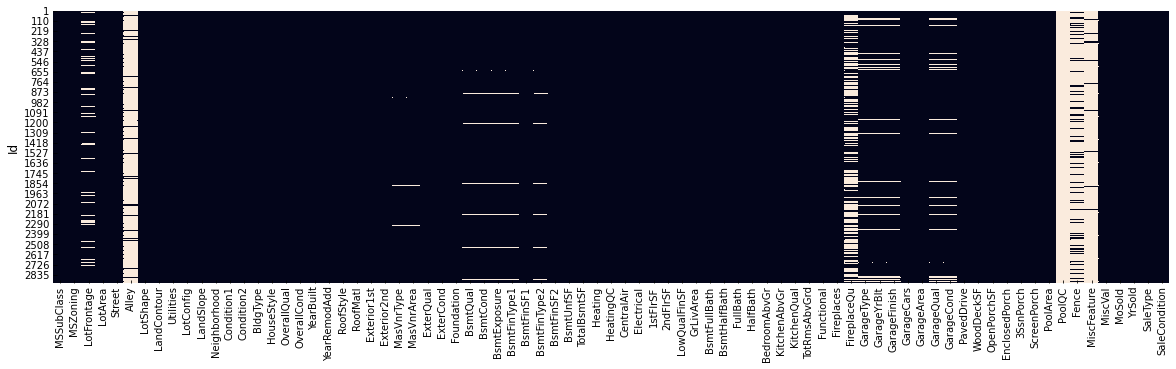

In [11]:
plt.figure(figsize=(20,5))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [12]:
# Number of missing values by feaure
display_all(df.isna().sum())

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [13]:
cols_nan = list()
for i, value in enumerate(df.isna().sum()):
    if value != 0:
        cols_nan.append(df.isna().sum().index[i])
        print('{} has {} missing values and represent {:.2f}%'.format(df.isna().sum().index[i], value, (value/df.shape[0])*100))

MSZoning has 4 missing values and represent 0.14%
LotFrontage has 486 missing values and represent 16.65%
Alley has 2721 missing values and represent 93.22%
Utilities has 2 missing values and represent 0.07%
Exterior1st has 1 missing values and represent 0.03%
Exterior2nd has 1 missing values and represent 0.03%
MasVnrType has 24 missing values and represent 0.82%
MasVnrArea has 23 missing values and represent 0.79%
BsmtQual has 81 missing values and represent 2.77%
BsmtCond has 82 missing values and represent 2.81%
BsmtExposure has 82 missing values and represent 2.81%
BsmtFinType1 has 79 missing values and represent 2.71%
BsmtFinSF1 has 1 missing values and represent 0.03%
BsmtFinType2 has 80 missing values and represent 2.74%
BsmtFinSF2 has 1 missing values and represent 0.03%
BsmtUnfSF has 1 missing values and represent 0.03%
TotalBsmtSF has 1 missing values and represent 0.03%
Electrical has 1 missing values and represent 0.03%
BsmtFullBath has 2 missing values and represent 0.07%

In [14]:
cols_nan_30 = [var for var in df.isnull().sum().index if df.isnull().sum()[var]/df.shape[0] > 0.3]
print('List of features with more than 30% of missing values: \n',cols_nan_30)

List of features with more than 30% of missing values: 
 ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


**Insigts:**
  
- Existing many features with missing values but there are five features with more than 30% of the total observations with missing values these are Alley, FireplaceQu, PoolQC, Fence, MiscFeature. These features are going to be eliminated
- The othere features could be impute

## Duplicate values

In [15]:
df.reset_index()[df.reset_index().duplicated(["Id"])]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition]
Index: []

[0 rows x 80 columns]

**Insigts:**
  
- There are not duplicated values in the dataframe, because there are not reapeated id's.

## Numerical Features

In [16]:
display_all(df.select_dtypes(include=np.number).describe())

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  2919.000000  2433.000000    2919.000000  2919.000000  2919.000000   
mean     57.137718    69.305795   10168.114080     6.089072     5.564577   
std      42.517628    23.344905    7886.996359     1.409947     1.113131   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7478.000000     5.000000     5.000000   
50%      50.000000    68.000000    9453.000000     6.000000     5.000000   
75%      70.000000    80.000000   11570.000000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  2919.000000   2919.000000  2896.000000  2918.000000  2918.000000   
mean   1971.312778   1984.264474   102.201312   441.423235    49.582248   
std      30.291442     20.894344   179.334253   455.610826   169.205611   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1953.500000   1965.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1993.000000     0.000000   368.500000     0.000000   
75%    2001.000000   2004.000000   164.000000   733.000000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1526.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  2918.000000  2918.000000  2919.000000  2919.000000   2919.000000   
mean    560.772104  1051.777587  1159.581706   336.483727      4.694416   
std     439.543659   440.766258   392.362079   428.701456     46.396825   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     220.000000   793.000000   876.000000     0.000000      0.000000   
50%     467.000000   989.500000  1082.000000     0.000000      0.000000   
75%     805.500000  1302.000000  1387.500000   704.000000      0.000000   
max    2336.000000  6110.000000  5095.000000  2065.000000   1064.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  2919.000000   2917.000000   2917.000000  2919.000000  2919.000000   
mean   1500.759849      0.429894      0.061364     1.568003     0.380267   
std     506.051045      0.524736      0.245687     0.552969     0.502872   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1126.000000      0.000000      0.000000     1.000000     0.000000   
50%    1444.000000      0.000000      0.000000     2.000000     0.000000   
75%    1743.500000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     4.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   2919.000000   2919.000000   2919.000000  2919.000000  2760.000000   
mean       2.860226      1.044536      6.451524     0.597122  1978.113406   
std        0.822693      0.214462      1.569379     0.646129    25.574285   
min        0.000000      0.000000      2.000000     0.000000  1895.000000   
25%        2.000000      1.000000      5.000000     0.000000  1960.000000   
50%        3.000000      1.000000      6.000000     1.000000  1979.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     15.000000     4.000000  2207.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  2918.000000  2918.000000  2919.000000  2919.000000    2919.000000   
mean      1.766621   472.874572    93.709832    47.486811      23.098321   
std       0.761624   215.394815   126.526589    67.575493      64.244246   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   320.000000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    26.000000       0.000000   
75%       2.000000   576.000000   168.000000    70.000000   

In [17]:
cols_num = df.select_dtypes(np.number).columns.tolist()
cols_num

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

### Box plots

In [18]:
# Check the distribution of numerical features using boxplot
def box_plot(cols, df):
    rows = math.ceil(len(cols)/3)
    fig, axes = plt.subplots(rows,3, figsize=(15,30))
    for col, ax in zip(cols, axes.ravel()):
        sns.boxplot(data=df, x=col, ax=ax)
        plt.xlabel(col)
    
    plt.suptitle("Box plots of features")
    #fig.delaxes(axes[1,2])
    plt.tight_layout()
    plt.show()

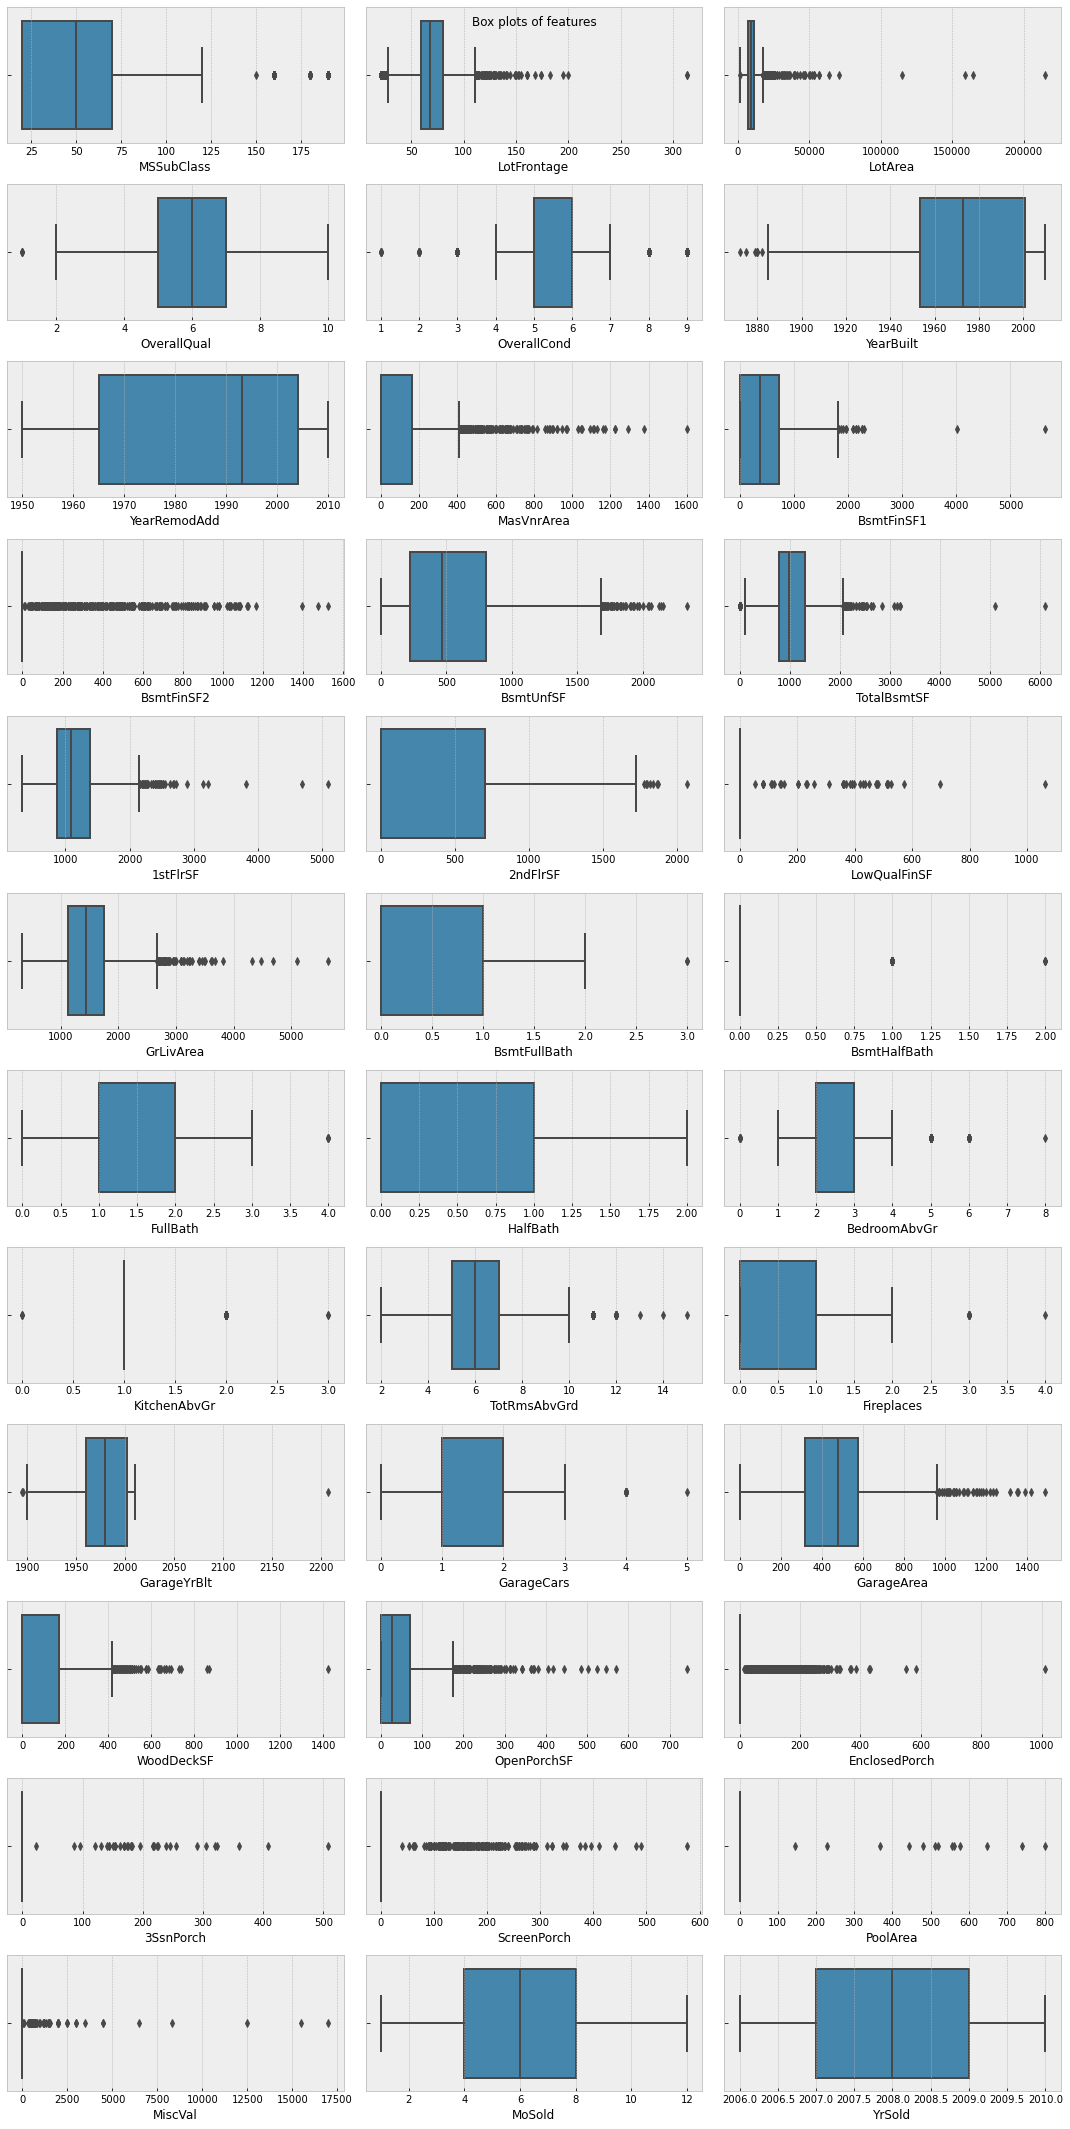

In [19]:
box_plot(cols_num, df)   

**Insigts:**
  
- There seem to be many outliers in the numerical features, but this tells us that there are many differences between the houses and that there are some groups of houses that are unique because of their attributes.

### Distribution plots

In [20]:
# Check the distribution of numerical features using hist
def distributions(cols, df):
    rows = math.ceil(len(cols)/3)
    fig, axes = plt.subplots(rows,3, figsize=(15,30))
    for col, ax in zip(cols, axes.ravel()):
        sns.histplot(data=df, x=col, ax=ax)
        plt.xlabel(col)
    
    plt.suptitle("Distribution of features")
    #fig.delaxes(axes[1,2])
    plt.tight_layout()
    plt.show()

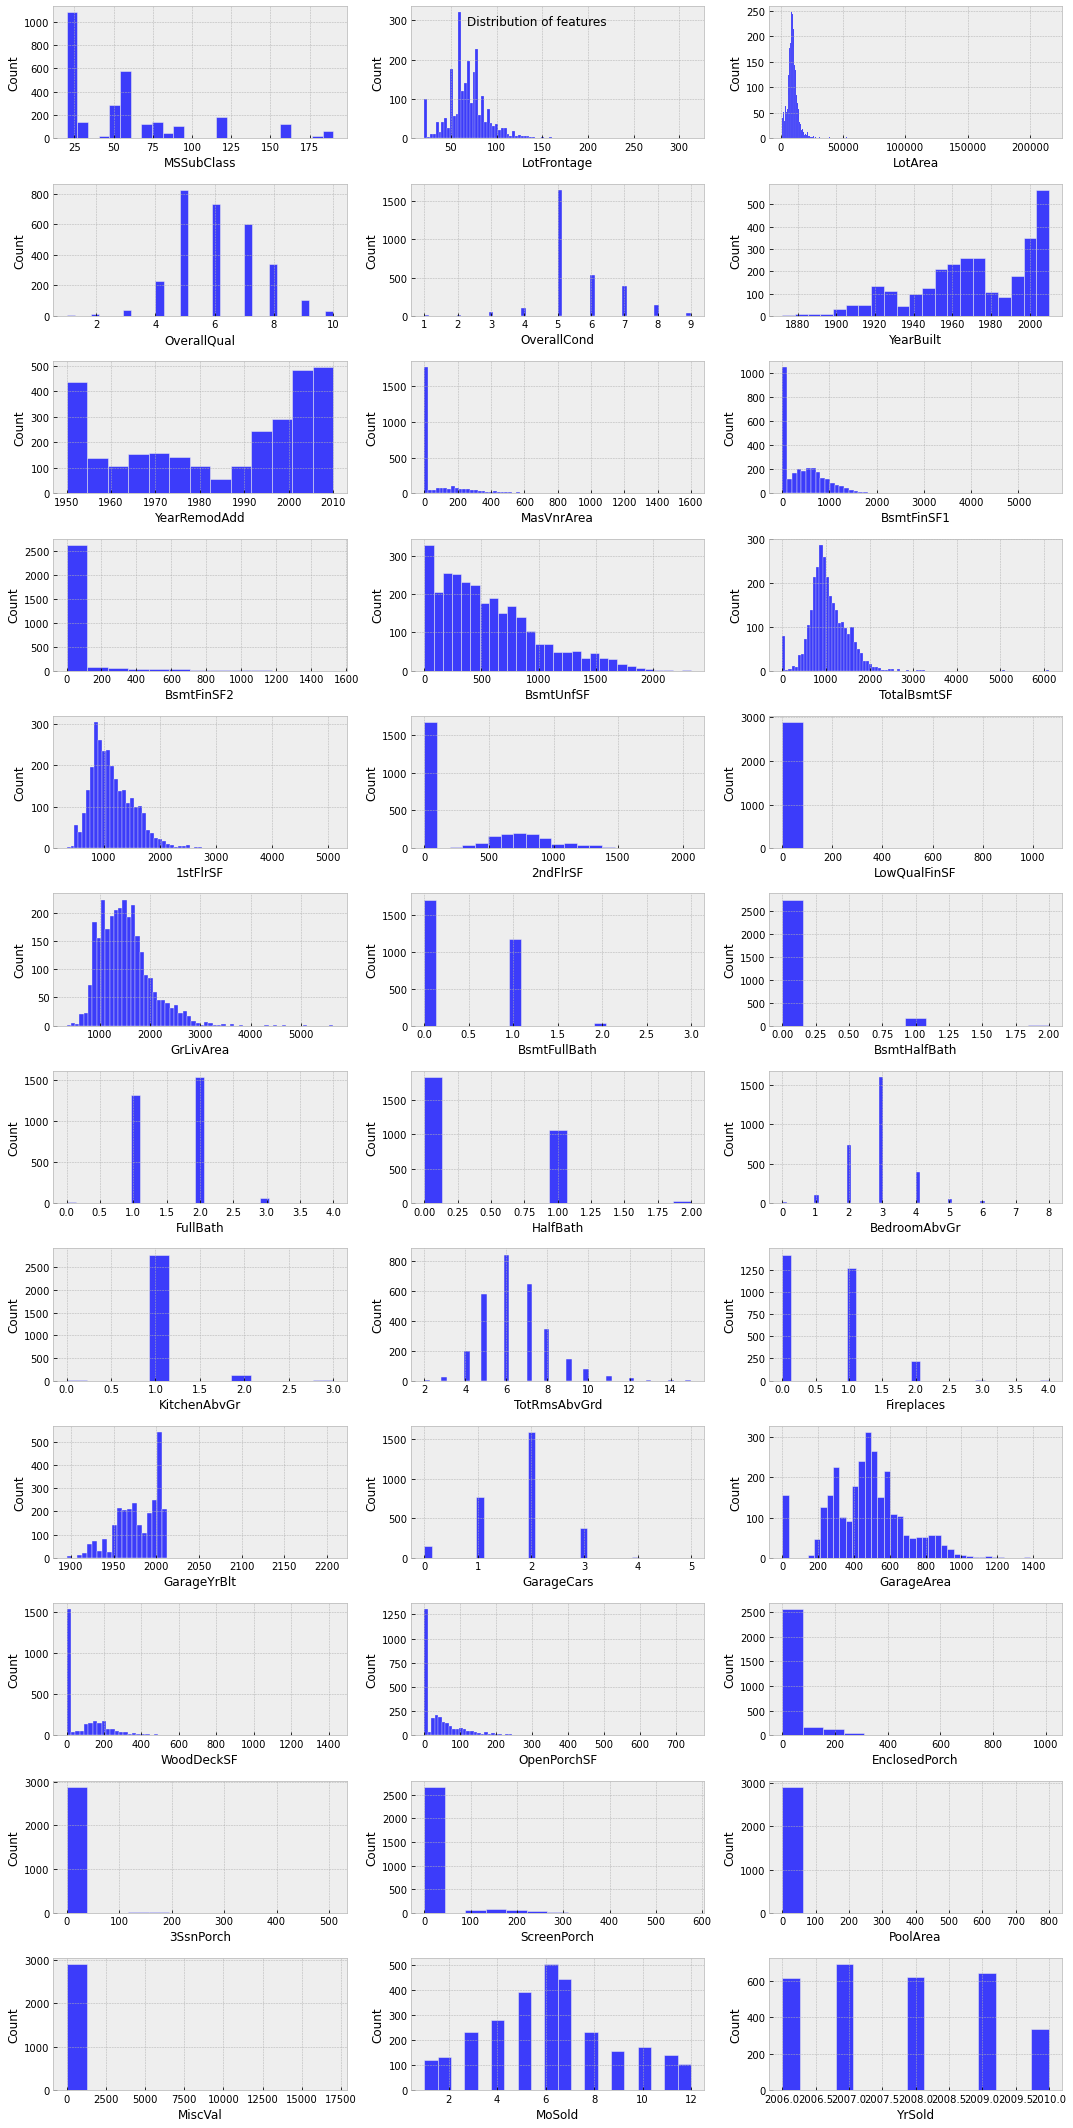

In [21]:
distributions(cols_num, df)    

**Insigts:**
  
- There are characteristics that do not have a normal distribution, but have a skewed distribution to the left.
- Other features have a numerical distribution but are discrete because they are clusters.

### Multi-collinearity

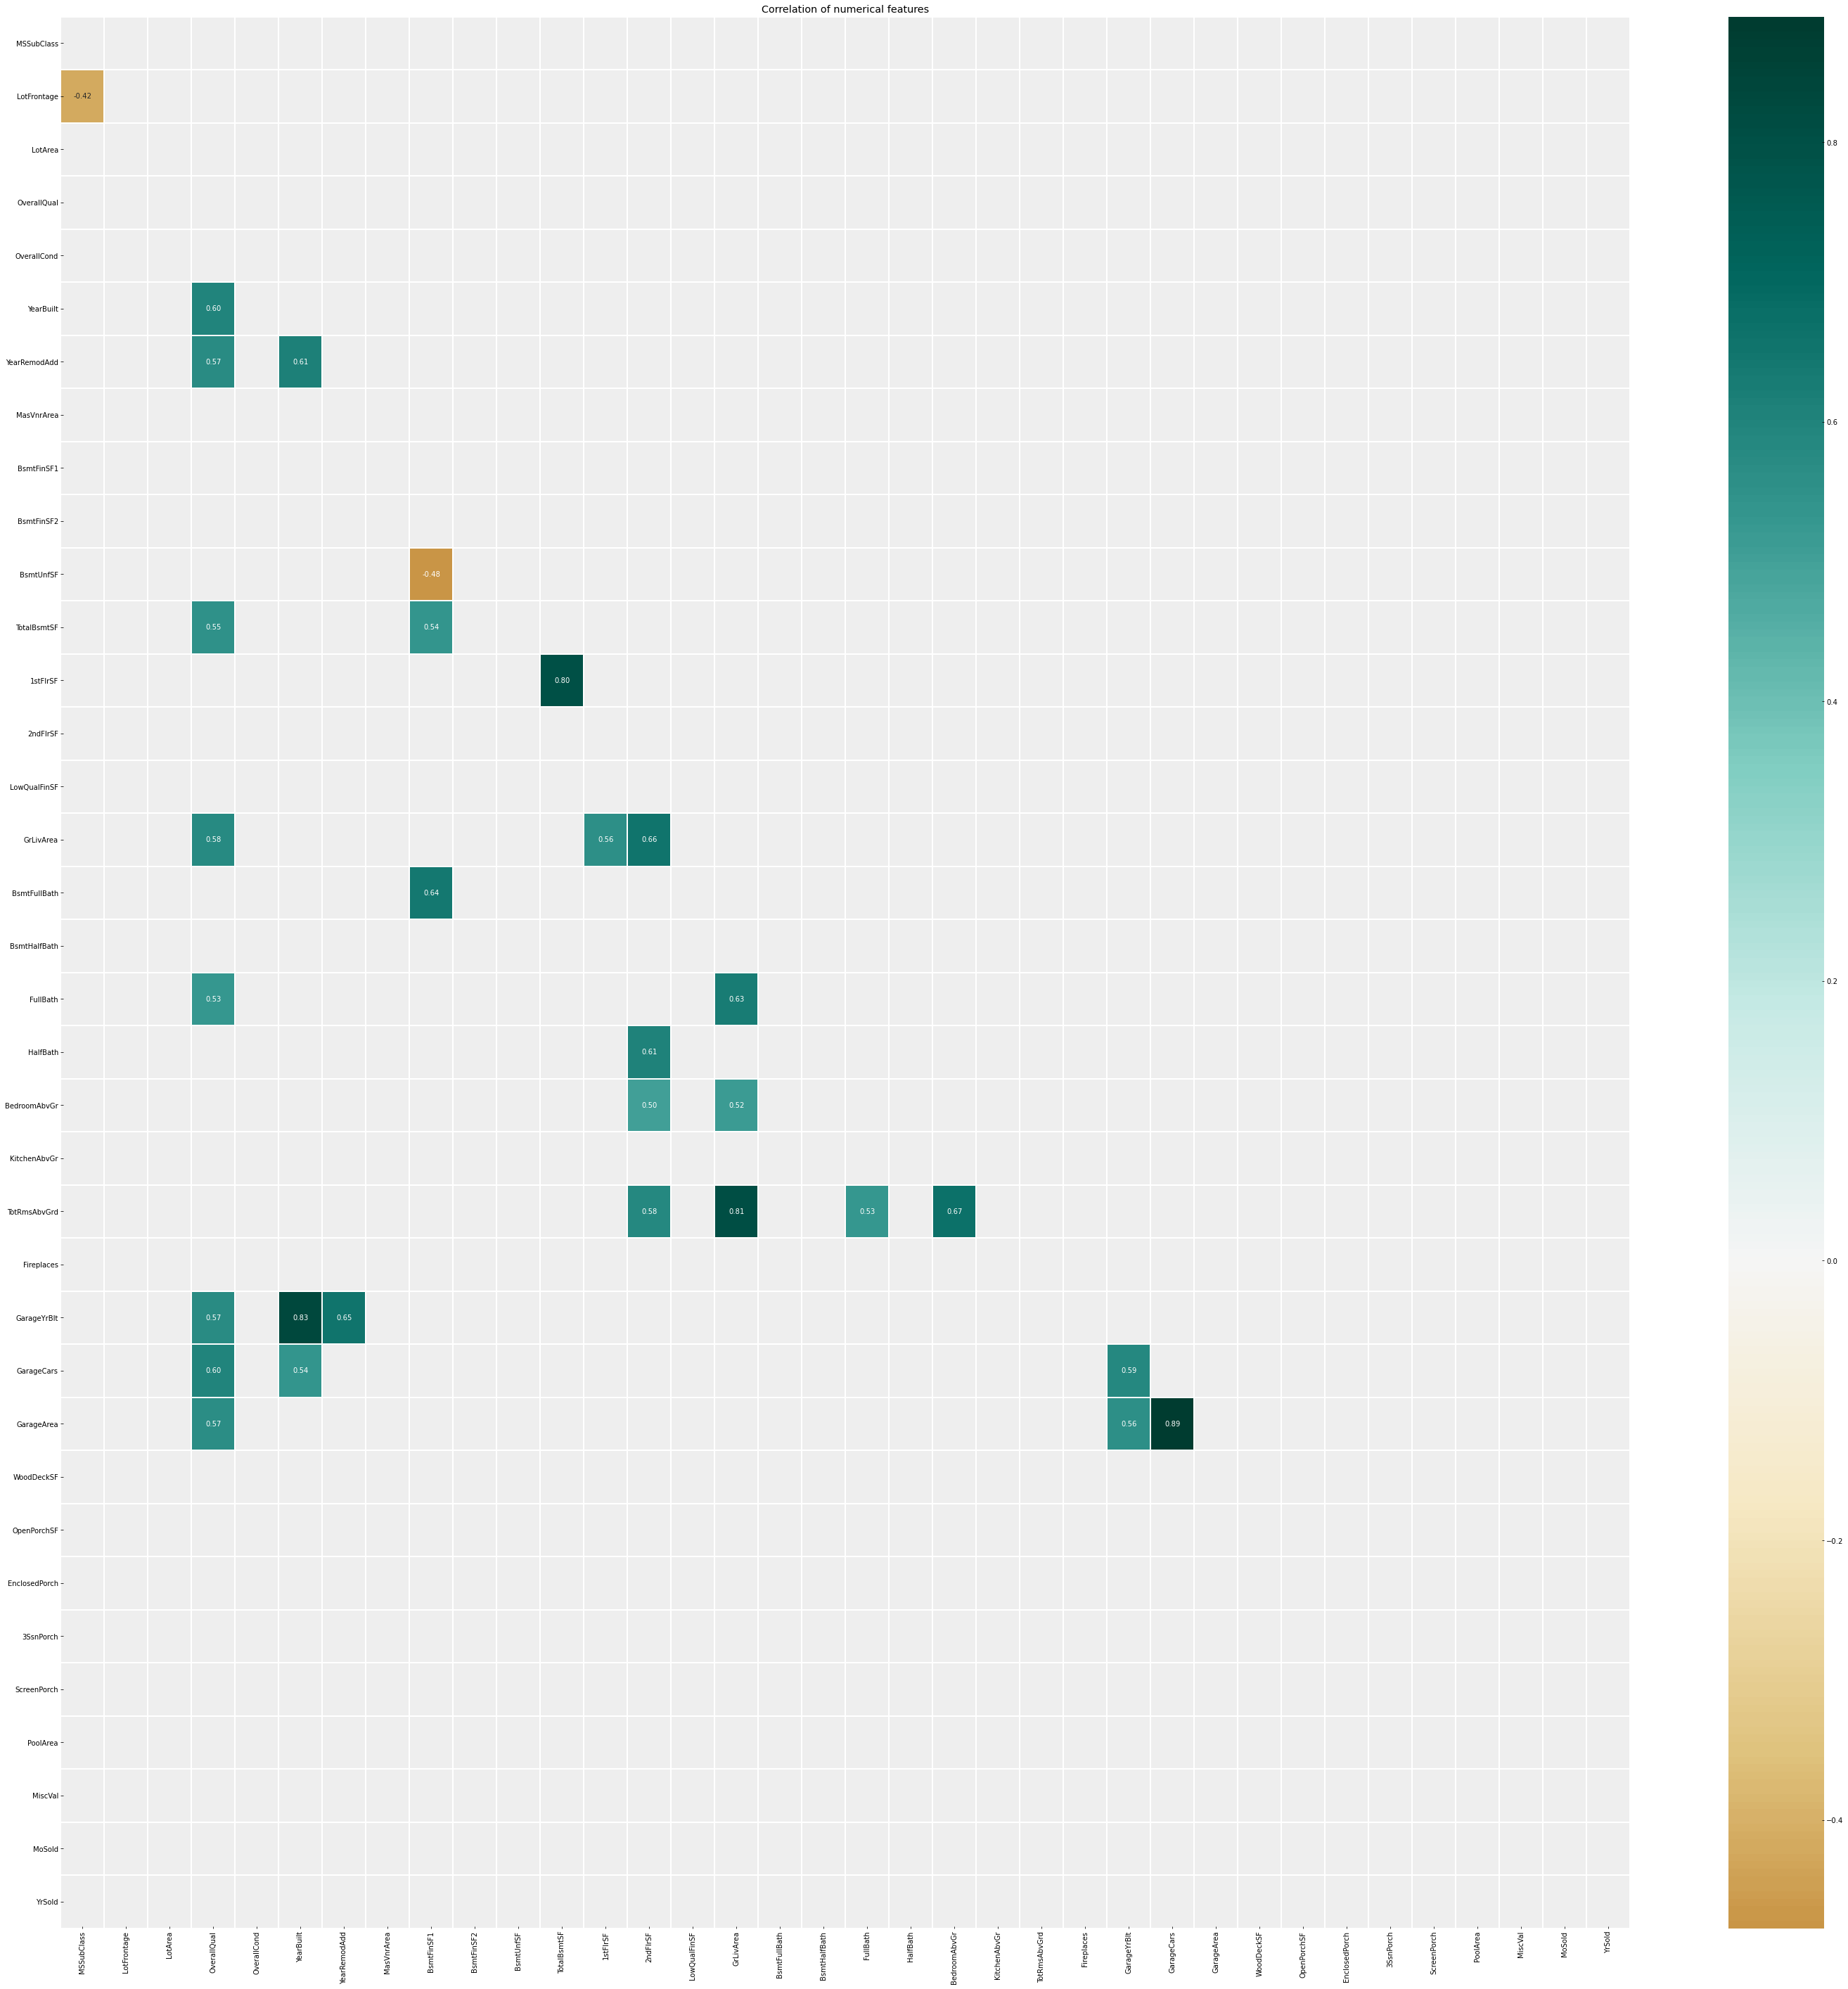

In [22]:
# Correlation of numerical features
df_corr = df[cols_num].corr()
plt.figure(figsize=(50,50))
mask = np.triu(np.ones_like(df[cols_num].corr(), dtype=np.bool))
plt.title('Correlation of numerical features')
sns.heatmap(df_corr[(df_corr>=0.5) | (df_corr<=-0.4)], mask=mask, annot=True, fmt='.2f', cmap='BrBG',  center=0, linewidths=1)
plt.show()

**Insigts:**
  
- Existing a strong relation between:
    - 1stFlrSF - TotalbSMTsf - 0.80
    - GarageYrBlt - YearBuilt - 0.83
    - AbvGrd - GrLivArea - 0.81
    - GarageArea - GarageCars - 0.89
- We have to do some test to prove if this features are 

## Categorical features

In [23]:
display_all(df.select_dtypes(include='object').describe())

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      2915   2919   198     2919        2919      2917      2919   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       2265   2907   120     1859        2622      2916      2133   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       2919         2919       2919       2919     2919       2919   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        2778          443       2511       2889     2425       1471   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       2919     2919        2918        2918       2895      2919   
unique         6        8          15          16          4         4   
top        Gable  CompShg     VinylSd     VinylSd       None        TA   
freq        2310     2876        1025        1014       1742      1798   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       2919       2919     2838     2837         2837         2840   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        2538       1308     1283     2606         1904          851   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          2839    2919      2919       2919       2918        2918   
unique            6       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           2493    2874      1493       2723       2671        1492   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        2917        1499       2762         2760       2760       2760   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         2717         744       1723         1230       2604       2654   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        2919     10    571         105     2918          2919  
unique          3      3      4           4        9             6  
top             Y     Ex  MnPrv        Shed       WD        Normal  
freq         2641      4    329          95     2525          2402

In [24]:
cols_cat = df.select_dtypes(include='object').columns.to_list()
cols_cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [25]:
def plot_cat(cols, df):
    rows = math.ceil(len(cols)/3)
    fig, axes = plt.subplots(rows,2, figsize=(15,60))
    for col, ax in zip(cols, axes.ravel()):
        sns.countplot(data=df, x=col, ax=ax)
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(),rotation=45)
        plt.xlabel(col)
    
    fig.suptitle("Distribution of categorical features")
    plt.tight_layout()
    plt.show()    

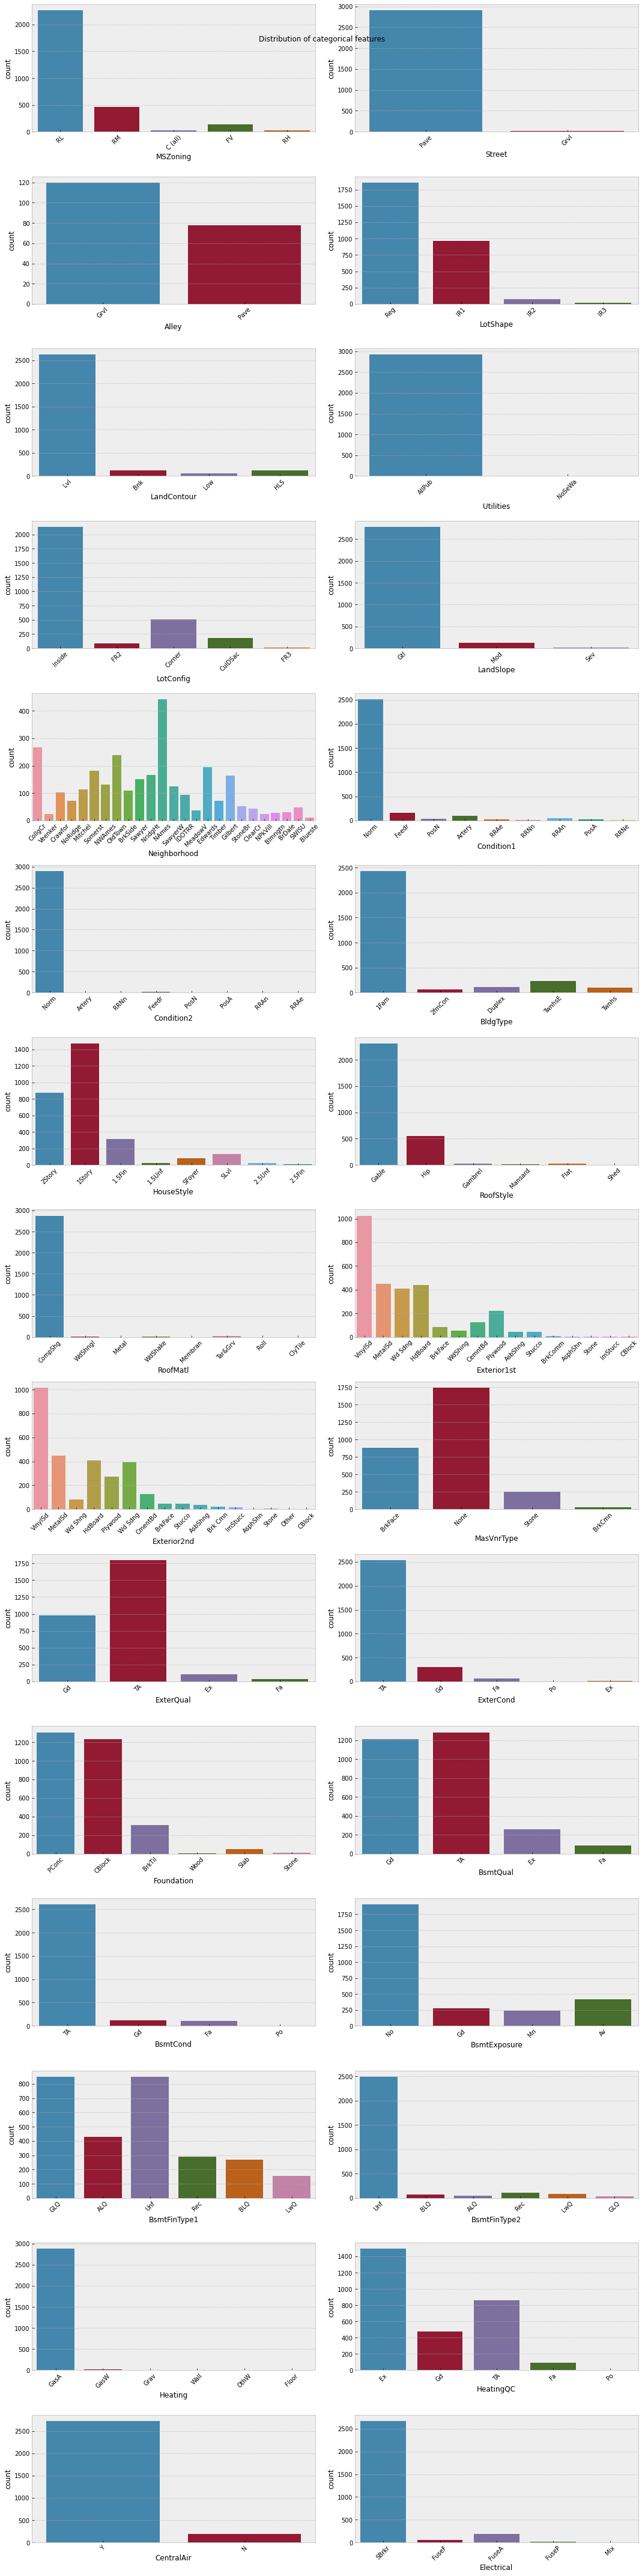

In [26]:
plot_cat(cols_cat, df)

**Insigts:**
  
- Mostly categorical features have a bias toward some subgroup. They are not equally distributed. This could create a bias in the model.


## Target feature

In [27]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [28]:
df_train['SalePrice'].isnull().sum()

0

<Figure size 720x360 with 0 Axes>

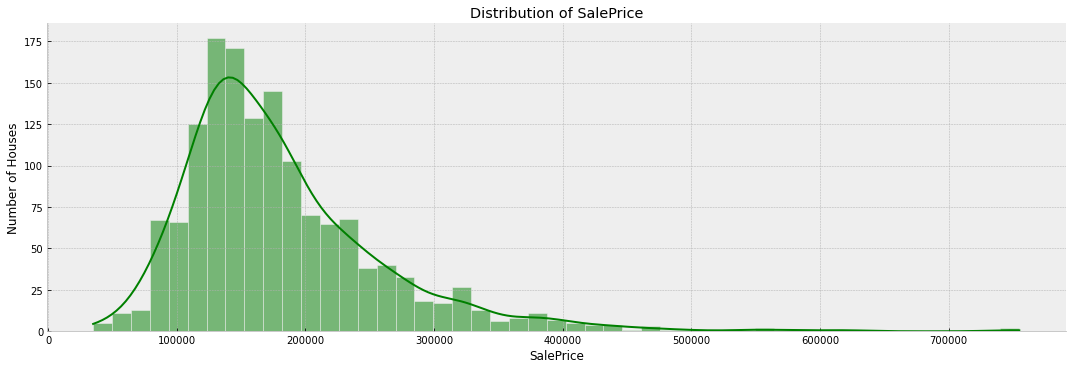

In [29]:
plt.figure(figsize=(10,5))
sns.displot(x="SalePrice", data=df_train, color='g', kde=True, aspect=3)
plt.title("Distribution of SalePrice")
plt.ylabel("Number of Houses")
plt.show()

**Insigts:**
  
- Our target feature don't have a normal distribution and is skewed to the left. We could apply log to convert it to a normal distribution.

<Figure size 720x360 with 0 Axes>

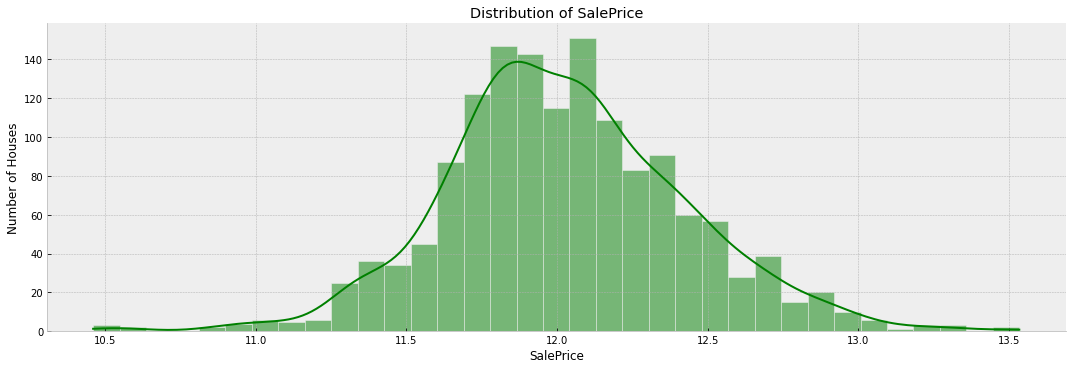

In [30]:
plt.figure(figsize=(10,5))
sns.displot(x=np.log(df_train["SalePrice"]), color='g', kde=True, aspect=3)
plt.title("Distribution of SalePrice")
plt.ylabel("Number of Houses")
plt.show()

**Insigts:**
  
- fill

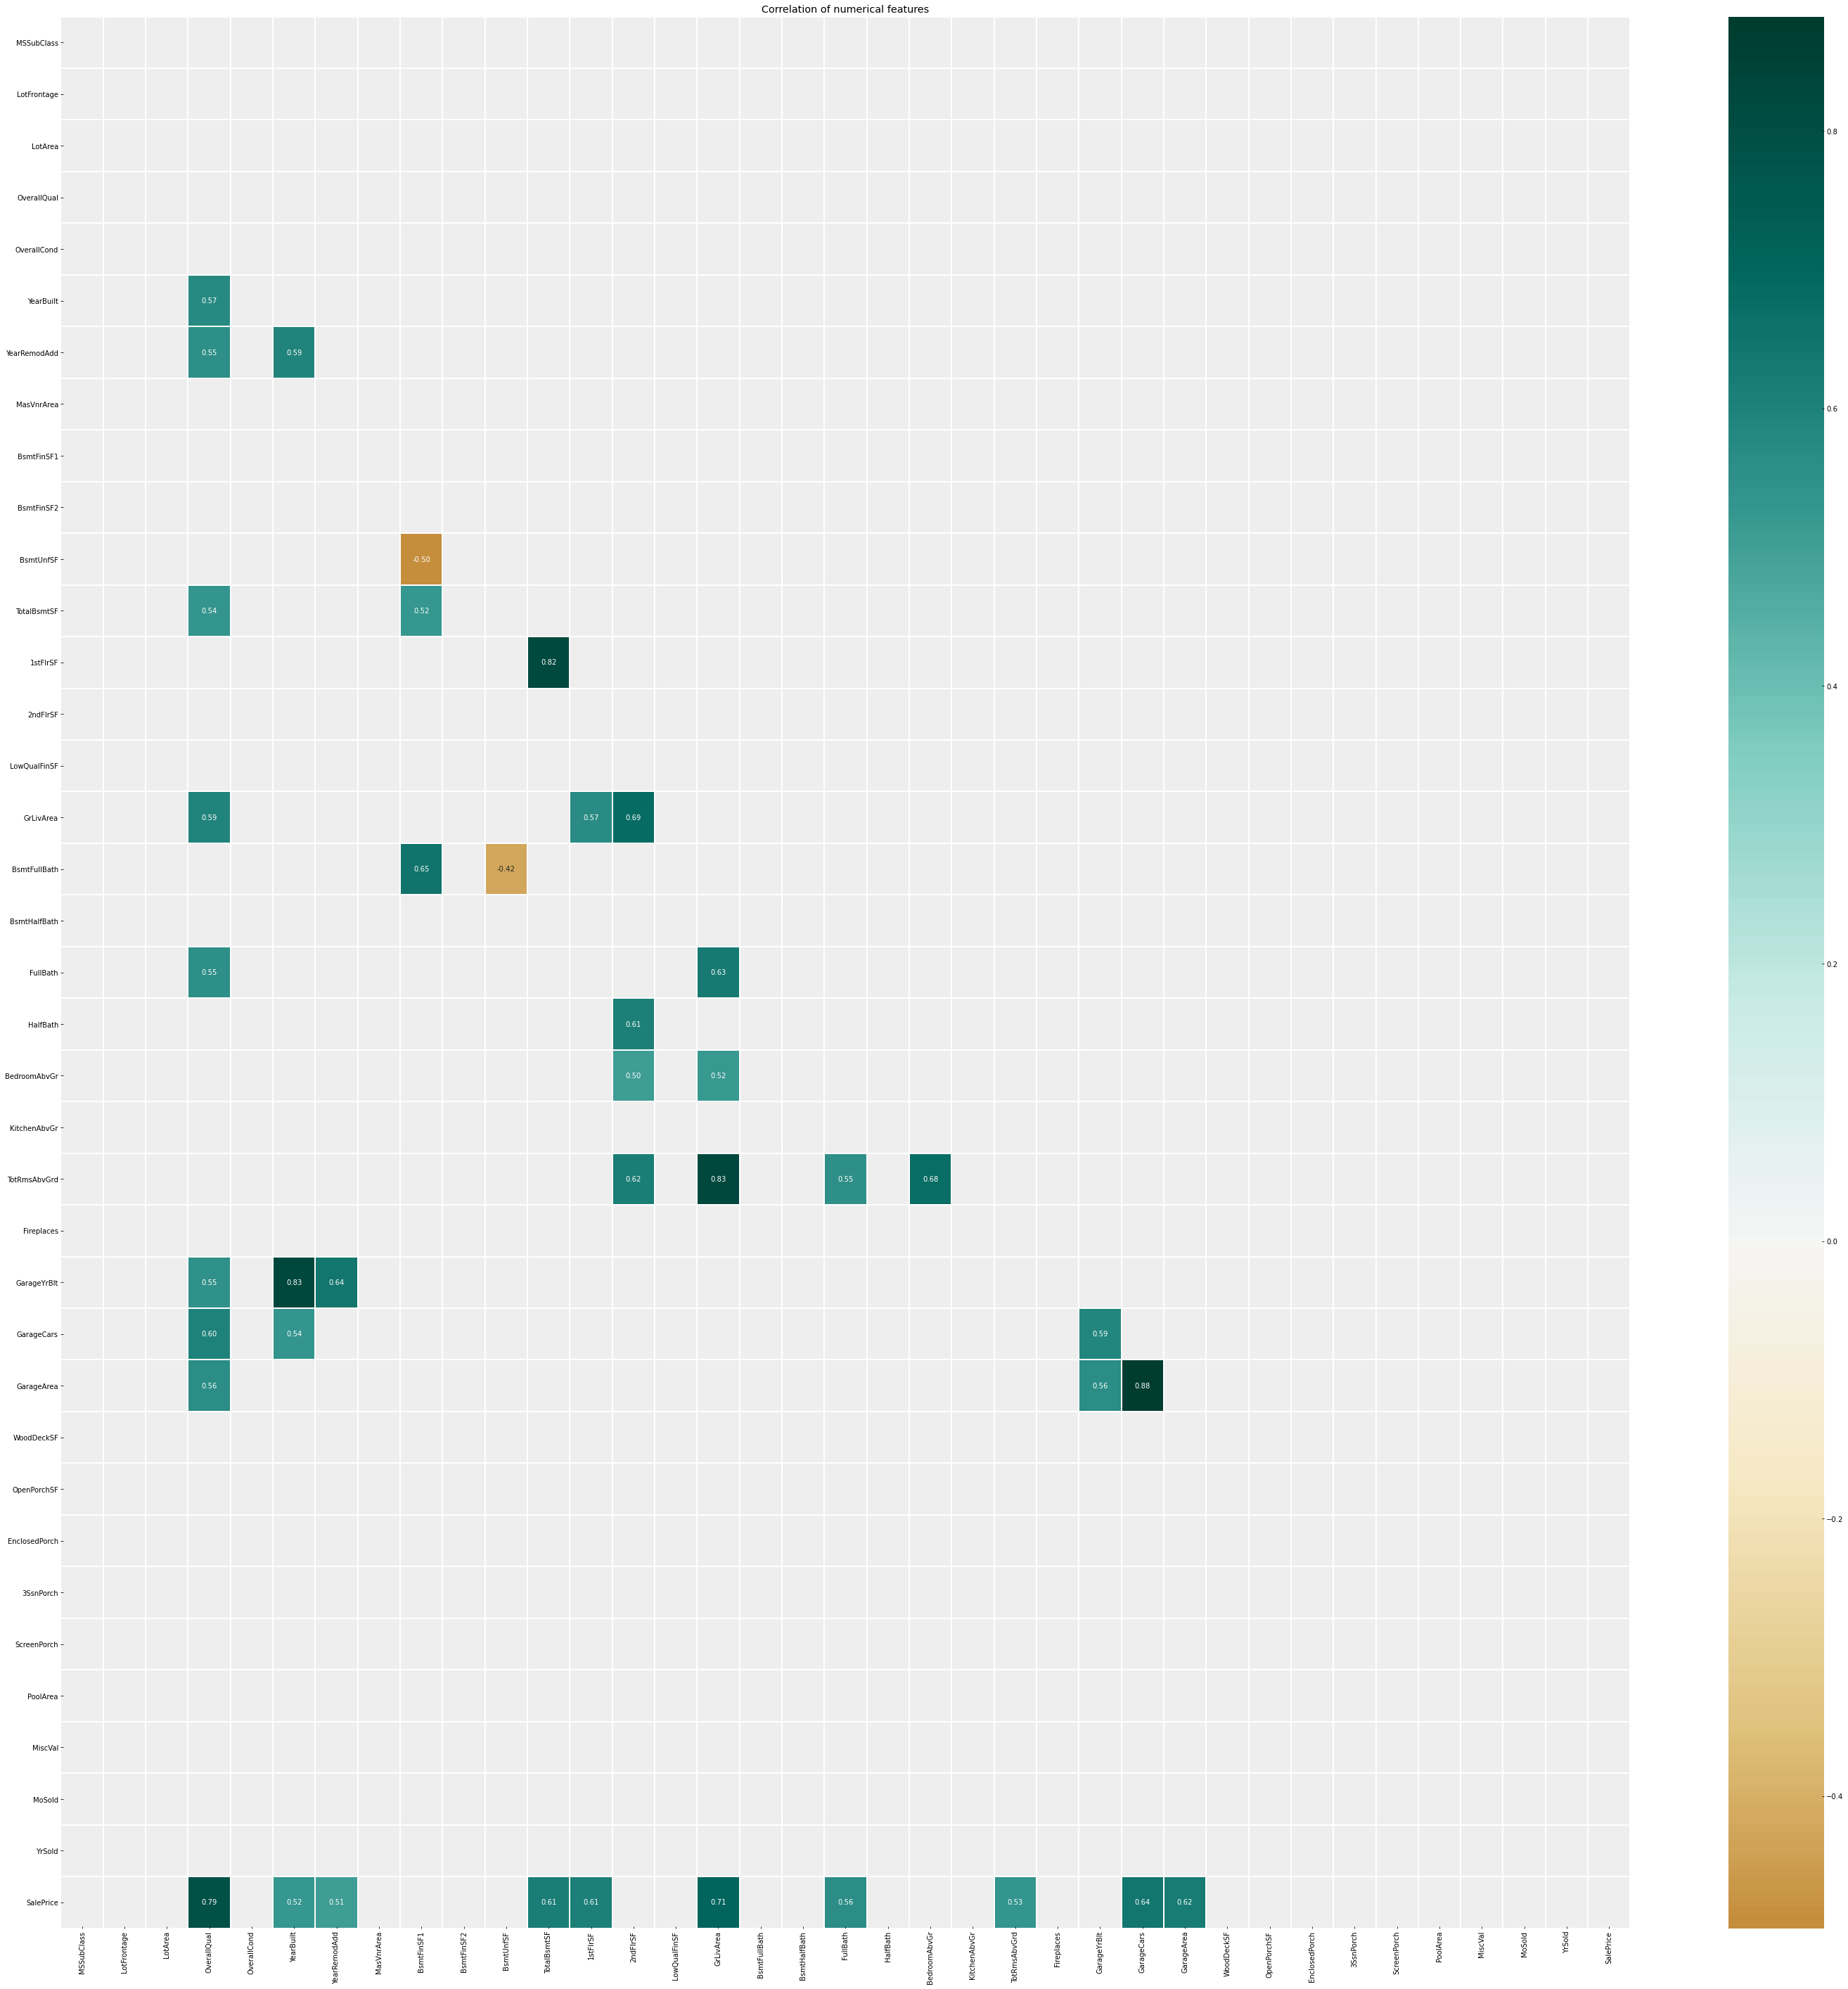

In [31]:
# Correlation of numerical features
df_corr = df_train.corr()
plt.figure(figsize=(50,50))
mask = np.triu(np.ones_like(df_train.corr(), dtype=np.bool))
plt.title('Correlation of numerical features')
sns.heatmap(df_corr[(df_corr>=0.5) | (df_corr<=-0.4)], mask=mask, annot=True, fmt='.2f', cmap='BrBG',  center=0, linewidths=1)
plt.show()

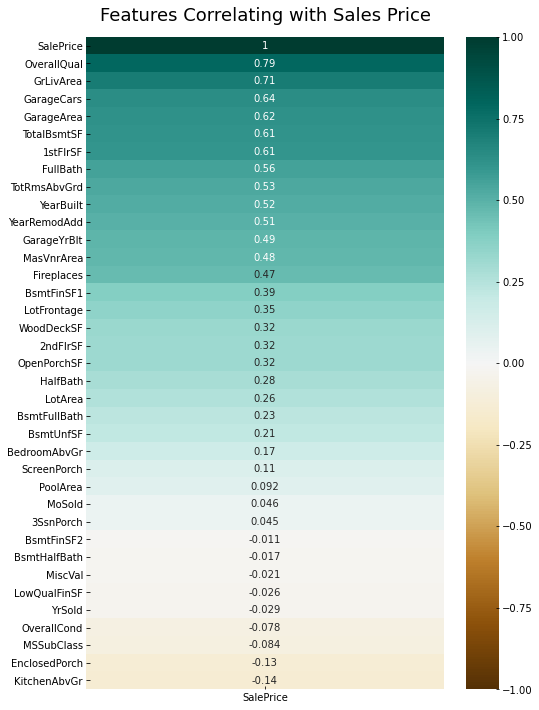

In [32]:
plt.figure(figsize=(8, 12))
sns.heatmap(df_train.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16)
plt.show()

**Insigts:**
  
- The features moslty correlate with Sale Price are:
    - OverallQual
    - GrLivArea
    - GarageCars
    - GarageArea
    - TotalBstSF
    - 1stFlrSF

# Analysis Data

In [33]:
def plot_cat_target(cols, target, df):
    rows = len(cols)
    fig, axes = plt.subplots(rows,1, figsize=(10,200))
    for col, ax in zip(cols, axes.ravel()):
        sns.boxplot(x=col, y=target, data = df.sort_values('SalePrice', ascending=False), ax=ax)
        #ax.set_title(col +' Vs. Price', fontsize=10)
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(),rotation=45)
        plt.xlabel(col)
   
    #fig.suptitle("Distribution of categorical features")
    plt.tight_layout()
    plt.show()  

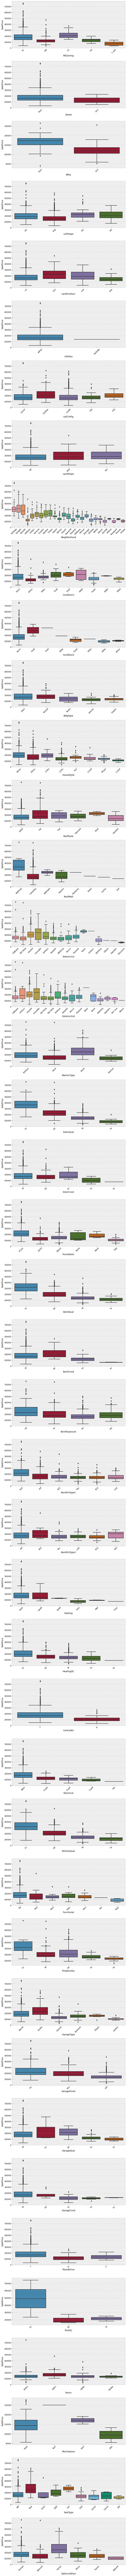

In [34]:
plot_cat_target(cols_cat, 'SalePrice', df_train)

**Insigts:**
  
We can see that there are several outliers and that in some categories like:
- In Utilities that almost all samples are towards Allpub so this feature can be eliminated.
- In LandSlope the Mod and Sev categories have approximately the same distribution so there would not be much difference between these two subgroups for the model.
- The winners with the highest price range of houses are NoRidge, Nrifghty and StoneBr.
- In feature condition 2 there is a bias between the subcategories PosA, RRAe and RRAn with almost zero proportions.
- In the feature BldgType between the different subgroups of the subcategories there is not much difference between the distributions so it might not be a working variable for the model.
- In the feature RoofMatl there are 4 subcategories that are null and would not be useful for the model.
- In the feature Exterior1st there are three subcategories that are null.
- In the feature Exterior2st there are two subcategories that are null.
- In the feature ExterCond the subgroup Po is null 
- In the feature Heating there are three subgroups that do not provide much information for the model. 
- In the feature HeatingQC the subgroup Po is null. 

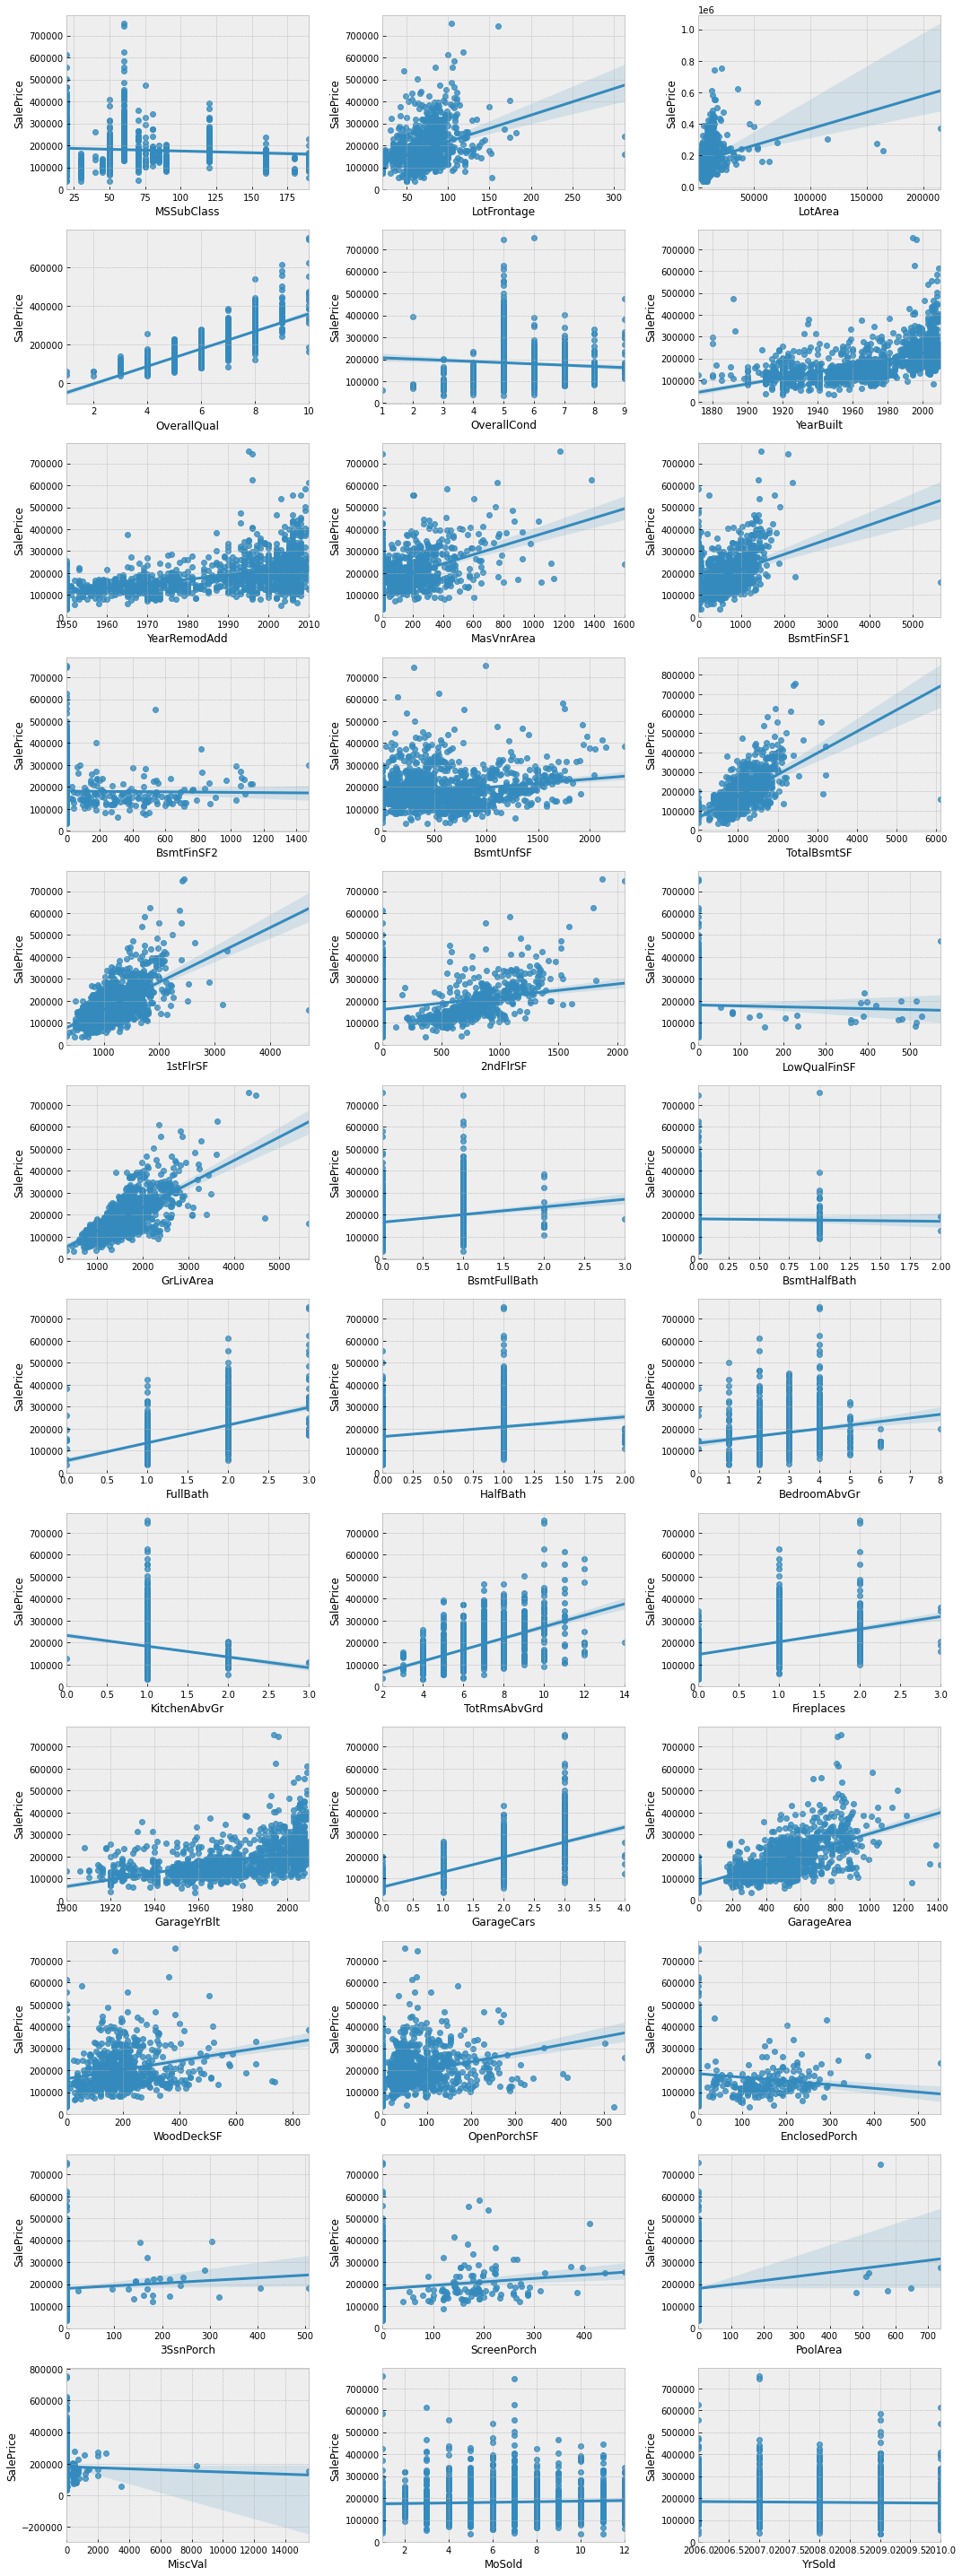

In [35]:
fig, axes = plt.subplots(round(len(cols_num)/3), 3, figsize=(15,40))
for var, ax in zip(cols_num, axes.flatten()):
    #sns.set(font_scale = 1.5) 
    sns.regplot(x = var, y = 'SalePrice', data = df_train, ax = ax);

plt.tight_layout()
plt.show()

**Insigts:**
  
- We can see that for the features lotarea, totalBsmetSF, 1stFlrSF, GrLivArea and GarageArea there is a linear relationship, for the other features there is no relationship since many of them are categorical.


# Feature Engineering & Data Cleaning

## Imputation

In [36]:
cols_imp = [col for col in cols_nan if col not in cols_nan_30]
for col in cols_imp:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

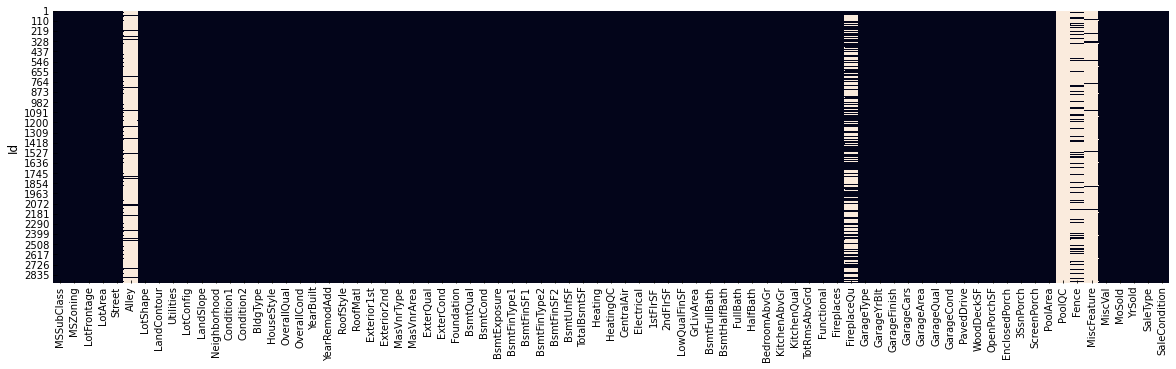

In [37]:
plt.figure(figsize=(20,5))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

**Insigts:**
  
- The variables with less than 30% of the total size were imputed as missing values, leaving only the columns with more than 30%.

## Outlier

In [66]:
# identify outliers in the training dataset
df_tmp = df[cols_num].iloc[:1460,:].dropna(axis=1)
lof = LocalOutlierFactor()
yhat = lof.fit_predict(df_tmp)
mask = yhat != -1
df_train_out = df_tmp.iloc[mask]

pd.DataFrame({'Dataframe':['Original Size', 'Modified Size', 'Sub'],
               'Size': [df_tmp.shape[0], df_train_out.shape[0], df_tmp.shape[0]-df_train_out.shape[0]]})

Dataframe  Size
0  Original Size  1460
1  Modified Size  1406
2            Sub    54

In [64]:
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(df_tmp)
mask = yhat != -1
df_train_out = df_train.iloc[mask]

pd.DataFrame({'Dataframe':['Original Size', 'Modified Size', 'Sub'],
               'Size': [df_tmp.shape[0], df_train_out.shape[0], df_tmp.shape[0]-df_train_out.shape[0]]})

Dataframe  Size
0  Original Size  1460
1  Modified Size  1314
2            Sub   146

**Insigts:**
  
- Using different algorithms to detect typical values, we can see that there are between 54 and 146 observations that should be eliminated.

## Feature: Total Suare Feet

In [70]:
df['TotalSF'] = (df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF'])
display_all(df.head())

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story            7            5       2003   
2        Norm     1Fam     1Story            6            8       1976   
3        Norm     1Fam     2Story            7            5       2001   
4        Norm     1Fam     2Story            7            5       1915   
5        Norm     1Fam     2Story            8            5       2000   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           1976     Gable  CompShg     MetalSd     MetalSd       None   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4           1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
5           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   
2          0.0        TA        TA     CBlock       Gd       TA           Gd   
3        162.0        Gd        TA      PConc       Gd       TA           Mn   
4          0.0        TA        TA     BrkTil       TA       Gd           No   
5        350.0        Gd        TA      PConc       Gd       TA           Av   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           GLQ       706.0          Unf         0.0      150.0        856.0   
2           ALQ       978.0          Unf         0.0      284.0       1262.0   
3           GLQ       486.0          Unf         0.0      434.0        920.0   
4           ALQ       216.0          Unf         0.0      540.0        756.0   
5           GLQ       655.0          Unf         0.0      490.0       1145.0   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                             
1     GasA        Ex          Y      SBrkr       856       854             0   
2     GasA        Ex          Y      SBrkr      1262         0             0   
3     GasA        Ex          Y      SBrkr       920       866             0   
4     GasA        Gd          Y      SBrkr       961       756             0   
5     GasA        Ex          Y      SBrkr      1145      1053             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                            
1        1710           1.0           0.0         2         1             3   
2        1262           0.0           1.0  

## Feature: Total Bathrooms

In [71]:
df['Total_Bathrooms'] = (df['FullBath']  + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))
display_all(df.head())

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story            7            5       2003   
2        Norm     1Fam     1Story            6            8       1976   
3        Norm     1Fam     2Story            7            5       2001   
4        Norm     1Fam     2Story            7            5       1915   
5        Norm     1Fam     2Story            8            5       2000   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           1976     Gable  CompShg     MetalSd     MetalSd       None   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4           1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
5           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   
2          0.0        TA        TA     CBlock       Gd       TA           Gd   
3        162.0        Gd        TA      PConc       Gd       TA           Mn   
4          0.0        TA        TA     BrkTil       TA       Gd           No   
5        350.0        Gd        TA      PConc       Gd       TA           Av   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           GLQ       706.0          Unf         0.0      150.0        856.0   
2           ALQ       978.0          Unf         0.0      284.0       1262.0   
3           GLQ       486.0          Unf         0.0      434.0        920.0   
4           ALQ       216.0          Unf         0.0      540.0        756.0   
5           GLQ       655.0          Unf         0.0      490.0       1145.0   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                             
1     GasA        Ex          Y      SBrkr       856       854             0   
2     GasA        Ex          Y      SBrkr      1262         0             0   
3     GasA        Ex          Y      SBrkr       920       866             0   
4     GasA        Gd          Y      SBrkr       961       756             0   
5     GasA        Ex          Y      SBrkr      1145      1053             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                            
1        1710           1.0           0.0         2         1             3   
2        1262           0.0           1.0  

## Feature: Total Porch Square Feet

In [72]:
df['Total_porch_sf'] = (df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + df['ScreenPorch'])
display_all(df.head())

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story            7            5       2003   
2        Norm     1Fam     1Story            6            8       1976   
3        Norm     1Fam     2Story            7            5       2001   
4        Norm     1Fam     2Story            7            5       1915   
5        Norm     1Fam     2Story            8            5       2000   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           1976     Gable  CompShg     MetalSd     MetalSd       None   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4           1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
5           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   
2          0.0        TA        TA     CBlock       Gd       TA           Gd   
3        162.0        Gd        TA      PConc       Gd       TA           Mn   
4          0.0        TA        TA     BrkTil       TA       Gd           No   
5        350.0        Gd        TA      PConc       Gd       TA           Av   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           GLQ       706.0          Unf         0.0      150.0        856.0   
2           ALQ       978.0          Unf         0.0      284.0       1262.0   
3           GLQ       486.0          Unf         0.0      434.0        920.0   
4           ALQ       216.0          Unf         0.0      540.0        756.0   
5           GLQ       655.0          Unf         0.0      490.0       1145.0   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                             
1     GasA        Ex          Y      SBrkr       856       854             0   
2     GasA        Ex          Y      SBrkr      1262         0             0   
3     GasA        Ex          Y      SBrkr       920       866             0   
4     GasA        Gd          Y      SBrkr       961       756             0   
5     GasA        Ex          Y      SBrkr      1145      1053             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                            
1        1710           1.0           0.0         2         1             3   
2        1262           0.0           1.0  

## Feature: Has Pool

In [73]:
df['hasapool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
display_all(df.head())

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story            7            5       2003   
2        Norm     1Fam     1Story            6            8       1976   
3        Norm     1Fam     2Story            7            5       2001   
4        Norm     1Fam     2Story            7            5       1915   
5        Norm     1Fam     2Story            8            5       2000   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           1976     Gable  CompShg     MetalSd     MetalSd       None   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4           1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
5           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   
2          0.0        TA        TA     CBlock       Gd       TA           Gd   
3        162.0        Gd        TA      PConc       Gd       TA           Mn   
4          0.0        TA        TA     BrkTil       TA       Gd           No   
5        350.0        Gd        TA      PConc       Gd       TA           Av   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           GLQ       706.0          Unf         0.0      150.0        856.0   
2           ALQ       978.0          Unf         0.0      284.0       1262.0   
3           GLQ       486.0          Unf         0.0      434.0        920.0   
4           ALQ       216.0          Unf         0.0      540.0        756.0   
5           GLQ       655.0          Unf         0.0      490.0       1145.0   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                             
1     GasA        Ex          Y      SBrkr       856       854             0   
2     GasA        Ex          Y      SBrkr      1262         0             0   
3     GasA        Ex          Y      SBrkr       920       866             0   
4     GasA        Gd          Y      SBrkr       961       756             0   
5     GasA        Ex          Y      SBrkr      1145      1053             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                            
1        1710           1.0           0.0         2         1             3   
2        1262           0.0           1.0  

## Feature: Has 2nd floor

In [74]:
df['has2ndfloor'] = df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
display_all(df.head())

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story            7            5       2003   
2        Norm     1Fam     1Story            6            8       1976   
3        Norm     1Fam     2Story            7            5       2001   
4        Norm     1Fam     2Story            7            5       1915   
5        Norm     1Fam     2Story            8            5       2000   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           1976     Gable  CompShg     MetalSd     MetalSd       None   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4           1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
5           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   
2          0.0        TA        TA     CBlock       Gd       TA           Gd   
3        162.0        Gd        TA      PConc       Gd       TA           Mn   
4          0.0        TA        TA     BrkTil       TA       Gd           No   
5        350.0        Gd        TA      PConc       Gd       TA           Av   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           GLQ       706.0          Unf         0.0      150.0        856.0   
2           ALQ       978.0          Unf         0.0      284.0       1262.0   
3           GLQ       486.0          Unf         0.0      434.0        920.0   
4           ALQ       216.0          Unf         0.0      540.0        756.0   
5           GLQ       655.0          Unf         0.0      490.0       1145.0   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                             
1     GasA        Ex          Y      SBrkr       856       854             0   
2     GasA        Ex          Y      SBrkr      1262         0             0   
3     GasA        Ex          Y      SBrkr       920       866             0   
4     GasA        Gd          Y      SBrkr       961       756             0   
5     GasA        Ex          Y      SBrkr      1145      1053             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                            
1        1710           1.0           0.0         2         1             3   
2        1262           0.0           1.0  

## Feature: Has a Garage

In [75]:
df['hasgarage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
display_all(df.head())

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story            7            5       2003   
2        Norm     1Fam     1Story            6            8       1976   
3        Norm     1Fam     2Story            7            5       2001   
4        Norm     1Fam     2Story            7            5       1915   
5        Norm     1Fam     2Story            8            5       2000   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           1976     Gable  CompShg     MetalSd     MetalSd       None   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4           1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
5           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   
2          0.0        TA        TA     CBlock       Gd       TA           Gd   
3        162.0        Gd        TA      PConc       Gd       TA           Mn   
4          0.0        TA        TA     BrkTil       TA       Gd           No   
5        350.0        Gd        TA      PConc       Gd       TA           Av   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           GLQ       706.0          Unf         0.0      150.0        856.0   
2           ALQ       978.0          Unf         0.0      284.0       1262.0   
3           GLQ       486.0          Unf         0.0      434.0        920.0   
4           ALQ       216.0          Unf         0.0      540.0        756.0   
5           GLQ       655.0          Unf         0.0      490.0       1145.0   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                             
1     GasA        Ex          Y      SBrkr       856       854             0   
2     GasA        Ex          Y      SBrkr      1262         0             0   
3     GasA        Ex          Y      SBrkr       920       866             0   
4     GasA        Gd          Y      SBrkr       961       756             0   
5     GasA        Ex          Y      SBrkr      1145      1053             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                            
1        1710           1.0           0.0         2         1             3   
2        1262           0.0           1.0  

## Feature: Has a Basement

In [76]:
df['hasbsmt'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
display_all(df.head())

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story            7            5       2003   
2        Norm     1Fam     1Story            6            8       1976   
3        Norm     1Fam     2Story            7            5       2001   
4        Norm     1Fam     2Story            7            5       1915   
5        Norm     1Fam     2Story            8            5       2000   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           1976     Gable  CompShg     MetalSd     MetalSd       None   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4           1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
5           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   
2          0.0        TA        TA     CBlock       Gd       TA           Gd   
3        162.0        Gd        TA      PConc       Gd       TA           Mn   
4          0.0        TA        TA     BrkTil       TA       Gd           No   
5        350.0        Gd        TA      PConc       Gd       TA           Av   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           GLQ       706.0          Unf         0.0      150.0        856.0   
2           ALQ       978.0          Unf         0.0      284.0       1262.0   
3           GLQ       486.0          Unf         0.0      434.0        920.0   
4           ALQ       216.0          Unf         0.0      540.0        756.0   
5           GLQ       655.0          Unf         0.0      490.0       1145.0   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                             
1     GasA        Ex          Y      SBrkr       856       854             0   
2     GasA        Ex          Y      SBrkr      1262         0             0   
3     GasA        Ex          Y      SBrkr       920       866             0   
4     GasA        Gd          Y      SBrkr       961       756             0   
5     GasA        Ex          Y      SBrkr      1145      1053             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                            
1        1710           1.0           0.0         2         1             3   
2        1262           0.0           1.0  

## Feature: Has Fireplace

In [77]:
df['hasfireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
display_all(df.head())

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story            7            5       2003   
2        Norm     1Fam     1Story            6            8       1976   
3        Norm     1Fam     2Story            7            5       2001   
4        Norm     1Fam     2Story            7            5       1915   
5        Norm     1Fam     2Story            8            5       2000   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           1976     Gable  CompShg     MetalSd     MetalSd       None   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4           1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
5           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   
2          0.0        TA        TA     CBlock       Gd       TA           Gd   
3        162.0        Gd        TA      PConc       Gd       TA           Mn   
4          0.0        TA        TA     BrkTil       TA       Gd           No   
5        350.0        Gd        TA      PConc       Gd       TA           Av   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           GLQ       706.0          Unf         0.0      150.0        856.0   
2           ALQ       978.0          Unf         0.0      284.0       1262.0   
3           GLQ       486.0          Unf         0.0      434.0        920.0   
4           ALQ       216.0          Unf         0.0      540.0        756.0   
5           GLQ       655.0          Unf         0.0      490.0       1145.0   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                             
1     GasA        Ex          Y      SBrkr       856       854             0   
2     GasA        Ex          Y      SBrkr      1262         0             0   
3     GasA        Ex          Y      SBrkr       920       866             0   
4     GasA        Gd          Y      SBrkr       961       756             0   
5     GasA        Ex          Y      SBrkr      1145      1053             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                            
1        1710           1.0           0.0         2         1             3   
2        1262           0.0           1.0  

## Drop

In [78]:
df.drop(cols_nan_30 + ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath',
                       'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'GarageArea'], 
                        axis=1, inplace=True)

display_all(df.head())

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
Id                                                                          
1           60       RL         65.0     8450   Pave      Reg         Lvl   
2           20       RL         80.0     9600   Pave      Reg         Lvl   
3           60       RL         68.0    11250   Pave      IR1         Lvl   
4           70       RL         60.0     9550   Pave      IR1         Lvl   
5           60       RL         84.0    14260   Pave      IR1         Lvl   

   Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
Id                                                                             
1     AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
2     AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
3     AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
4     AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
5     AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

   HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
Id                                                                           
1      2Story            7            5       2003          2003     Gable   
2      1Story            6            8       1976          1976     Gable   
3      2Story            7            5       2001          2002     Gable   
4      2Story            7            5       1915          1970     Gable   
5      2Story            8            5       2000          2000     Gable   

   RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
Id                                                                     
1   CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd   
2   CompShg     MetalSd     MetalSd       None         0.0        TA   
3   CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd   
4   CompShg     Wd Sdng     Wd Shng       None         0.0        TA   
5   CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd   

   ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
Id                                                                    
1         TA      PConc       Gd       TA           No          GLQ   
2         TA     CBlock       Gd       TA           Gd          ALQ   
3         TA      PConc       Gd       TA           Mn          GLQ   
4         TA     BrkTil       TA       Gd           No          ALQ   
5         TA      PConc       Gd       TA           Av          GLQ   

    BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF Heating HeatingQC  \
Id                                                                     
1        706.0          Unf         0.0      150.0    GasA        Ex   
2        978.0          Unf         0.0      284.0    GasA        Ex   
3        486.0          Unf         0.0      434.0    GasA        Ex   
4        216.0          Unf         0.0      540.0    GasA        Gd   
5        655.0          Unf         0.0      490.0    GasA        Ex   

   CentralAir Electrical  LowQualFinSF  GrLivArea  BedroomAbvGr  KitchenAbvGr  \
Id                                                                              
1           Y      SBrkr             0       1710             3             1   
2           Y      SBrkr             0       1262             3             1   
3           Y      SBrkr             0       1786             3             1   
4           Y      SBrkr             0       1717             3             1   
5           Y      SBrkr             0       2198             4             1   

   KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
Id                                                                            
1           Gd             8        Typ           0     Attchd       2003.0   
2           TA             6        Typ    

**Insigts:**
  
- All features that had more than 30% of the total as missing values were removed from the dataframe as well as those that were used to create new features.

## Scaling numerical features

In [79]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[df.select_dtypes(np.number).columns.tolist()].values) 
scaled_features_df = pd.DataFrame(scaled_features, 
                                  index=df[df.select_dtypes(np.number).columns.tolist()].index, 
                                  columns=df[df.select_dtypes(np.number).columns.tolist()].columns)

display_all(scaled_features_df.head())

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
Id                                                                           
1     0.067331    -0.191815 -0.217879     0.646183    -0.507284   1.046258   
2    -0.873616     0.511940 -0.072044    -0.063185     2.188279   0.154764   
3     0.067331    -0.051064  0.137197     0.646183    -0.507284   0.980221   
4     0.302568    -0.426400 -0.078385     0.646183    -0.507284  -1.859351   
5     0.067331     0.699608  0.518903     1.355551    -0.507284   0.947203   

    YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  LowQualFinSF  \
Id                                                                              
1       0.896833    0.529034    0.580959   -0.293025  -0.934782     -0.101197   
2      -0.395604   -0.567016    1.178162   -0.293025  -0.629818     -0.101197   
3       0.848965    0.338903    0.097928   -0.293025  -0.288441     -0.101197   
4      -0.682812   -0.567016   -0.494884   -0.293025  -0.047201     -0.101197   
5       0.753229    1.390216    0.468984   -0.293025  -0.160994     -0.101197   

    GrLivArea  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
Id                                                                    
1    0.413547      0.169927     -0.207698      0.986849   -0.924311   
2   -0.471891      0.169927     -0.207698     -0.287758    0.623632   
3    0.563755      0.169927     -0.207698     -0.287758    0.623632   
4    0.427382      0.169927     -0.207698      0.349546    0.623632   
5    1.378042      1.385655     -0.207698      1.624153    0.623632   

    GarageYrBlt  GarageCars  WoodDeckSF   MiscVal    MoSold    YrSold  \
Id                                                                      
1      0.998954    0.306418   -0.740760 -0.089592 -1.552184  0.157646   
2     -0.086940    0.306418    1.614879 -0.089592 -0.446925 -0.602962   
3      0.918517    0.306418   -0.740760 -0.089592  1.026753  0.157646   
4      0.797862    1.619830   -0.740760 -0.089592 -1.552184 -1.363569   
5      0.878299    1.619830    0.776967 -0.089592  2.132012  0.157646   

     TotalSF  Total_Bathrooms  Total_porch_sf  hasapool  has2ndfloor  \
Id                                                                     
1   0.022596         1.584766       -0.261852 -0.066884     1.154701   
2  -0.029611         0.348216       -0.827273 -0.066884    -0.866025   
3   0.196618         1.584766       -0.437967 -0.066884     1.154701   
4  -0.093004        -0.270058        2.018368 -0.066884     1.154701   
5   0.988418         1.584766       -0.048661 -0.066884     1.154701   

    hasgarage   hasbsmt  hasfireplace  
Id                                     
1    0.238417  0.165696     -1.027440  
2    0.238417  0.165696      0.973292  
3    0.238417  0.165696      0.973292  
4    0.238417  0.165696      0.973292  
5    0.238417  0.165696      0.973292

## Encoding categorical features

In [80]:
encode_features_df = pd.get_dummies(df[df.select_dtypes('object').columns.tolist()])
encode_features_df.head()

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
Id                                                                         
1                  0            0            0            1            0   
2                  0            0            0            1            0   
3                  0            0            0            1            0   
4                  0            0            0            1            0   
5                  0            0            0            1            0   

    Street_Grvl  Street_Pave  LotShape_IR1  LotShape_IR2  LotShape_IR3  ...  \
Id                                                                      ...   
1             0            1             0             0             0  ...   
2             0            1             0             0             0  ...   
3             0            1             1             0             0  ...   
4             0            1             1             0             0  ...   
5             0            1             1             0             0  ...   

    SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
Id                                                            
1                0             0             0            1   
2                0             0             0            1   
3                0             0             0            1   
4                0             0             0            1   
5                0             0             0            1   

    SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
Id                                                                       
1                       0                      0                     0   
2                       0                      0                     0   
3                       0                      0                     0   
4                       1                      0                     0   
5                       0                      0                     0   

    SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
Id                                                                     
1                      0                     1                      0  
2                      0                     1                      0  
3                      0                     1                      0  
4                      0                     0                      0  
5                      0                     1                      0  

[5 rows x 234 columns]

## Separation between dependent and independent features

In [81]:
X = pd.concat([scaled_features_df, encode_features_df], axis=1)
X.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
Id                                                                           
1     0.067331    -0.191815 -0.217879     0.646183    -0.507284   1.046258   
2    -0.873616     0.511940 -0.072044    -0.063185     2.188279   0.154764   
3     0.067331    -0.051064  0.137197     0.646183    -0.507284   0.980221   
4     0.302568    -0.426400 -0.078385     0.646183    -0.507284  -1.859351   
5     0.067331     0.699608  0.518903     1.355551    -0.507284   0.947203   

    YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLw  \
Id                                                    ...                   
1       0.896833    0.529034    0.580959   -0.293025  ...               0   
2      -0.395604   -0.567016    1.178162   -0.293025  ...               0   
3       0.848965    0.338903    0.097928   -0.293025  ...               0   
4      -0.682812   -0.567016   -0.494884   -0.293025  ...               0   
5       0.753229    1.390216    0.468984   -0.293025  ...               0   

    SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
Id                                                                   
1              0             0            1                      0   
2              0             0            1                      0   
3              0             0            1                      0   
4              0             0            1                      1   
5              0             0            1                      0   

    SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
Id                                                                      
1                       0                     0                     0   
2                       0                     0                     0   
3                       0                     0                     0   
4                       0                     0                     0   
5                       0                     0                     0   

    SaleCondition_Normal  SaleCondition_Partial  
Id                                               
1                      1                      0  
2                      1                      0  
3                      1                      0  
4                      0                      0  
5                      1                      0  

[5 rows x 265 columns]

In [82]:
y = np.log(df_train['SalePrice'])
y.head()

Id
1    12.247694
2    12.109011
3    12.317167
4    11.849398
5    12.429216
Name: SalePrice, dtype: float64

## Separation between train and holdout dataframes

In [83]:
X_train_ = X.iloc[:1460]
X_train_.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
Id                                                                           
1     0.067331    -0.191815 -0.217879     0.646183    -0.507284   1.046258   
2    -0.873616     0.511940 -0.072044    -0.063185     2.188279   0.154764   
3     0.067331    -0.051064  0.137197     0.646183    -0.507284   0.980221   
4     0.302568    -0.426400 -0.078385     0.646183    -0.507284  -1.859351   
5     0.067331     0.699608  0.518903     1.355551    -0.507284   0.947203   

    YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLw  \
Id                                                    ...                   
1       0.896833    0.529034    0.580959   -0.293025  ...               0   
2      -0.395604   -0.567016    1.178162   -0.293025  ...               0   
3       0.848965    0.338903    0.097928   -0.293025  ...               0   
4      -0.682812   -0.567016   -0.494884   -0.293025  ...               0   
5       0.753229    1.390216    0.468984   -0.293025  ...               0   

    SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
Id                                                                   
1              0             0            1                      0   
2              0             0            1                      0   
3              0             0            1                      0   
4              0             0            1                      1   
5              0             0            1                      0   

    SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
Id                                                                      
1                       0                     0                     0   
2                       0                     0                     0   
3                       0                     0                     0   
4                       0                     0                     0   
5                       0                     0                     0   

    SaleCondition_Normal  SaleCondition_Partial  
Id                                               
1                      1                      0  
2                      1                      0  
3                      1                      0  
4                      0                      0  
5                      1                      0  

[5 rows x 265 columns]

In [84]:
X_test_ = X.iloc[1460:]
X_test_.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
Id                                                                             
1461   -0.873616     0.511940  0.184371    -0.772552     0.391237  -0.340510   
1462   -0.873616     0.558857  0.519791    -0.063185     0.391237  -0.439565   
1463    0.067331     0.230438  0.464374    -0.772552    -0.507284   0.848148   
1464    0.067331     0.418106 -0.024109    -0.063185     0.391237   0.881166   
1465    1.478753    -1.223988 -0.654748     1.355551    -0.507284   0.683057   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLw  \
Id                                                      ...                   
1461     -1.113625   -0.567016    0.058407    0.558290  ...               0   
1462     -1.257229    0.036930    1.057404   -0.293025  ...               0   
1463      0.657493   -0.567016    0.767585   -0.293025  ...               0   
1464      0.657493   -0.455174    0.352617   -0.293025  ...               0   
1465      0.370284   -0.567016   -0.391691   -0.293025  ...               0   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
Id                                                                     
1461             0             0            1                      0   
1462             0             0            1                      0   
1463             0             0            1                      0   
1464             0             0            1                      0   
1465             0             0            1                      0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
Id                                                                        
1461                      0                     0                     0   
1462                      0                     0                     0   
1463                      0                     0                     0   
1464                      0                     0                     0   
1465                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
Id                                                 
1461                     1                      0  
1462                     1                      0  
1463                     1                      0  
1464                     1                      0  
1465                     1                      0  

[5 rows x 265 columns]

## Feature Selection

In [85]:
importance_feature = pd.DataFrame(mutual_info_regression(X_train_,y), index=X_train_.columns)
importance_feature .columns = ['Importance']
display_all(importance_feature.sort_values(by='Importance', ascending=False))

Importance
TotalSF                  0.683964
OverallQual              0.572988
GrLivArea                0.458301
GarageCars               0.366228
YearBuilt                0.355907
Total_Bathrooms          0.342329
GarageYrBlt              0.295163
MSSubClass               0.277059
ExterQual_TA             0.263864
YearRemodAdd             0.240639
GarageFinish_Unf         0.226316
TotRmsAbvGrd             0.222777
KitchenQual_TA           0.219949
LotFrontage              0.217995
ExterQual_Gd             0.216739
BsmtQual_TA              0.200302
Foundation_PConc         0.177945
KitchenQual_Gd           0.177035
Fireplaces               0.172369
LotArea                  0.168080
hasfireplace             0.168034
BsmtQual_Gd              0.152535
BsmtFinSF1               0.148052
HeatingQC_Ex             0.132871
BsmtUnfSF                0.126569
GarageFinish_Fin         0.119763
BsmtQual_Ex              0.115816
Total_porch_sf           0.112759
OverallCond              0.109747
GarageType_Detchd        0.105347
Exterior2nd_VinylSd      0.101961
BsmtFinType1_GLQ         0.101670
WoodDeckSF               0.100676
Foundation_CBlock        0.097676
Exterior1st_VinylSd      0.093394
HeatingQC_TA             0.092929
LotShape_Reg             0.088275
GarageFinish_RFn         0.088009
MasVnrArea               0.084883
KitchenQual_Ex           0.081931
MSZoning_RM              0.080455
SaleType_New             0.075575
SaleCondition_Partial    0.073560
Neighborhood_NAmes       0.068011
CentralAir_N             0.067970
ExterQual_Ex             0.066503
LotShape_IR1             0.066170
Neighborhood_NridgHt     0.065534
CentralAir_Y             0.065285
MasVnrType_None          0.063395
BedroomAbvGr             0.061884
GarageType_Attchd        0.057722
hasgarage                0.054273
Neighborhood_NoRidge     0.053842
MasVnrType_Stone         0.053367
MSZoning_RL              0.051497
Electrical_SBrkr         0.050864
PavedDrive_Y             0.046302
HouseStyle_2Story        0.046221
Neighborhood_Somerst     0.043296
PavedDrive_N             0.042000
Neighborhood_Gilbert     0.041546
Foundation_BrkTil        0.041161
SaleType_WD              0.040716
Neighborhood_CollgCr     0.039451
BsmtExposure_No          0.039016
BsmtExposure_Gd          0.031958
Exterior2nd_Wd Sdng      0.031920
Electrical_FuseA         0.031403
Neighborhood_OldTown     0.030958
BsmtFinType1_Unf         0.030843
MSZoning_FV              0.030790
KitchenQual_Fa           0.030301
MasVnrType_BrkFace       0.030286
Exterior1st_Wd Sdng      0.028145
HouseStyle_1.5Fin        0.027387
Neighborhood_IDOTRR      0.026015
hasbsmt                  0.025568
BsmtFinType1_ALQ         0.025557
GarageType_BuiltIn       0.024124
SaleCondition_Normal     0.023283
BsmtFinType1_Rec         0.023101
Exterior2nd_MetalSd      0.022541
BldgType_Duplex          0.022430
LandContour_Bnk          0.022022
LotConfig_CulDSac        0.021684
ExterCond_Fa             0.021162
Neighborhood_Edwards     0.020204
KitchenAbvGr             0.019923
HeatingQC_Fa             0.019731
Neighborhood_NWAmes      0.019697
RoofStyle_Gable          0.019583
HeatingQC_Gd             0.019498
Neighborhood_BrkSide     0.019298
GarageCond_Fa            0.019152
Neighborhood_Sawyer      0.018573
LandContour_Lvl          0.018377
BsmtExposure_Av          0.017855
Exterior1st_MetalSd      0.017537
Neighborhood_MeadowV     0.016467
ExterQual_Fa             0.016399
BsmtCond_Fa              0.016110
GarageQual_Fa            0.015678
Exterior1st_CemntBd      0.015361
Exterior1st_HdBoard      0.015203
Exterior2nd_CmentBd      0.015191
Neighborhood_BrDale      0.015105
GarageCond_TA            0.015076
has2ndfloor              0.015036
RoofStyle_Hip            0.014986
Condition1_Artery        0.014968
BsmtFinType1_BLQ         0.014665
Functional_Typ           0.014528
Heating_GasA             0.013965
Foundation_Slab          0.013560
Electrical_FuseF         0.012695
BsmtFinType1_LwQ         0.012556
Neighborhoo

**Insigts:**
  
- As can be seen there are many features that are not relevant according to the feature selection algorithm so those features that are of zero importance are eliminated.

In [89]:
imp_zero = importance_feature[importance_feature['Importance'] == 0].index.to_list()

X_train_.drop(imp_zero,axis=1, inplace=True)
X_test_.drop(imp_zero,axis=1, inplace=True)
display_all(X_train_.head())
display_all(X_test_.head())

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
Id                                                                           
1     0.067331    -0.191815 -0.217879     0.646183    -0.507284   1.046258   
2    -0.873616     0.511940 -0.072044    -0.063185     2.188279   0.154764   
3     0.067331    -0.051064  0.137197     0.646183    -0.507284   0.980221   
4     0.302568    -0.426400 -0.078385     0.646183    -0.507284  -1.859351   
5     0.067331     0.699608  0.518903     1.355551    -0.507284   0.947203   

    YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  LowQualFinSF  \
Id                                                                              
1       0.896833    0.529034    0.580959   -0.293025  -0.934782     -0.101197   
2      -0.395604   -0.567016    1.178162   -0.293025  -0.629818     -0.101197   
3       0.848965    0.338903    0.097928   -0.293025  -0.288441     -0.101197   
4      -0.682812   -0.567016   -0.494884   -0.293025  -0.047201     -0.101197   
5       0.753229    1.390216    0.468984   -0.293025  -0.160994     -0.101197   

    GrLivArea  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
Id                                                                    
1    0.413547      0.169927     -0.207698      0.986849   -0.924311   
2   -0.471891      0.169927     -0.207698     -0.287758    0.623632   
3    0.563755      0.169927     -0.207698     -0.287758    0.623632   
4    0.427382      0.169927     -0.207698      0.349546    0.623632   
5    1.378042      1.385655     -0.207698      1.624153    0.623632   

    GarageYrBlt  GarageCars  WoodDeckSF   MiscVal   TotalSF  Total_Bathrooms  \
Id                                                                             
1      0.998954    0.306418   -0.740760 -0.089592  0.022596         1.584766   
2     -0.086940    0.306418    1.614879 -0.089592 -0.029611         0.348216   
3      0.918517    0.306418   -0.740760 -0.089592  0.196618         1.584766   
4      0.797862    1.619830   -0.740760 -0.089592 -0.093004        -0.270058   
5      0.878299    1.619830    0.776967 -0.089592  0.988418         1.584766   

    Total_porch_sf  has2ndfloor  hasgarage   hasbsmt  hasfireplace  \
Id                                                                   
1        -0.261852     1.154701   0.238417  0.165696     -1.027440   
2        -0.827273    -0.866025   0.238417  0.165696      0.973292   
3        -0.437967     1.154701   0.238417  0.165696      0.973292   
4         2.018368     1.154701   0.238417  0.165696      0.973292   
5        -0.048661     1.154701   0.238417  0.165696      0.973292   

    MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
Id                                                                         
1                  0            0            0            1            0   
2                  0            0            0            1            0   
3                  0            0            0            1            0   
4                  0            0            0            1            0   
5                  0            0            0            1            0   

    Street_Pave  LotShape_IR1  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
Id                                                                        
1             1             0             0             0             1   
2             1             0             0             0             1   
3             1             1             0             0             0   
4             1             1             0             0             0   
5             1             1             0             0             0   

    LandContour_Bnk  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
Id                                                                       
1                 0                0                0                1   
2                 0                0                0     

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
Id                                                                             
1461   -0.873616     0.511940  0.184371    -0.772552     0.391237  -0.340510   
1462   -0.873616     0.558857  0.519791    -0.063185     0.391237  -0.439565   
1463    0.067331     0.230438  0.464374    -0.772552    -0.507284   0.848148   
1464    0.067331     0.418106 -0.024109    -0.063185     0.391237   0.881166   
1465    1.478753    -1.223988 -0.654748     1.355551    -0.507284   0.683057   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
Id                                                                  
1461     -1.113625   -0.567016    0.058407    0.558290  -0.661680   
1462     -1.257229    0.036930    1.057404   -0.293025  -0.352165   
1463      0.657493   -0.567016    0.767585   -0.293025  -0.964368   
1464      0.657493   -0.455174    0.352617   -0.293025  -0.538784   
1465      0.370284   -0.567016   -0.391691   -0.293025   1.038379   

      LowQualFinSF  GrLivArea  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
Id                                                                        
1461     -0.101197  -1.195262     -1.045801     -0.207698     -0.925062   
1462     -0.101197  -0.339470      0.169927     -0.207698     -0.287758   
1463     -0.101197   0.253457      0.169927     -0.207698     -0.287758   
1464     -0.101197   0.204046      0.169927     -0.207698      0.349546   
1465     -0.101197  -0.436315     -1.045801     -0.207698     -0.925062   

      Fireplaces  GarageYrBlt  GarageCars  WoodDeckSF    MiscVal   TotalSF  \
Id                                                                           
1461   -0.924311    -0.690214   -1.006994    0.365916  -0.089592 -0.956900   
1462   -0.924311    -0.810869   -1.006994    2.365838  21.944410  0.136953   
1463    0.623632     0.757644    0.306418    0.935064  -0.089592  0.011409   
1464    0.623632     0.797862    0.306418    2.104979  -0.089592 -0.022153   
1465   -0.924311     0.556553    0.306418   -0.740760  -0.089592  0.015138   

      Total_Bathrooms  Total_porch_sf  has2ndfloor  hasgarage   hasbsmt  \
Id                                                                        
1461        -1.506608        0.285030    -0.866025   0.238417  0.165696   
1462        -0.888333       -0.493582    -0.866025   0.238417  0.165696   
1463         0.348216       -0.512120     1.154701   0.238417  0.165696   
1464         0.348216       -0.493582     1.154701   0.238417  0.165696   
1465        -0.270058        1.267564    -0.866025   0.238417  0.165696   

      hasfireplace  MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
Id                                                                            
1461     -1.027440                 0            0            1            0   
1462     -1.027440                 0            0            0            1   
1463      0.973292                 0            0            0            1   
1464      0.973292                 0            0            0            1   
1465     -1.027440                 0            0            0            1   

      MSZoning_RM  Street_Pave  LotShape_IR1  LotShape_IR2  LotShape_IR3  \
Id                                                                         
1461            0            1             0             0             0   
1462            0            1             1             0             0   
1463            0            1             1             0             0   
1464            0            1             1             0             0   
1465            0            1             1             0             0   

      LotShape_Reg  LandContour_Bnk  LandContour_HLS  LandContour_Low  \
Id                                                                      
1461             1                0                0                0   
1462             0                0                0    

# Modeling

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_train_, y, test_size=0.3, random_state=27)

In [91]:
def predict(ml_model, mode):
    
    if mode==0:
        model = ml_model.fit(X_train, y_train)
    else:
        model = ml_model
    
    if mode != 2:
        print('Training Score: {}'.format(model.score(X_train, y_train)))
        print('\n')
    else:
        print('Training Score: {}'.format(r2_score(y_train, model.predict(DM_train))))
        print('\n')
    
    if mode != 2:
        predictions = model.predict(X_test)
    else:
        predictions = model.predict(DM_test)
    
    print('Five first Predictions are: {}'.format(predictions[:5]))
    print('Five first Real values are: {}'.format(y_test.values[:5]))
    print('\n')
    
    r2 = r2_score(y_test, predictions)
    print('R^2 Score is: {}'.format(r2))
    MSE = mean_squared_error(y_test, predictions)
    print('Mean Square Error(MSE) is: {}'.format(MSE))
    RMSE = math.sqrt(mean_squared_error(y_test, predictions))
    print('Root Mean Square Error(RMSE) is: {}'.format(RMSE))
    MAE = mean_absolute_error(y_test, predictions)
    print('Mean Absolute Error is: {}'.format(MAE))
    MEAE = median_absolute_error(y_test, predictions)
    print('Median Absolute Error is: {}'.format(MEAE))
    MAPE = mean_absolute_percentage_error(y_test, predictions)
    print('Mean Absolute Percentage Error is: {}'.format(MAPE))
    print('Max Error is: {}'.format(max_error(y_test, predictions)))
    print('\n')
    
    #Distribution of the errors
    plt.figure( figsize=(20,5))
    sns.displot(y_test-predictions)
    plt.title('Error Distribution', fontsize=16)
    plt.xlabel('Sale Price', fontsize=16)
    plt.ylabel('# Count Values', fontsize=16)
    plt.show()
    
    metrics = [r2, MSE, RMSE, MAE, MEAE, MAPE]
    return model, metrics

## Model: LinearRegression

In [92]:
#%%time
#lr, lr_m = predict(LinearRegression(),0)

## Model: DecisionTreeRegressor

Training Score: 1.0


Five first Predictions are: [12.35233515 12.5776362  11.820116   11.60823564 12.54686767]
Five first Real values are: [12.31716669 12.4292162  11.76368418 11.77143616 12.56024446]


R^2 Score is: 0.6973602842797471
Mean Square Error(MSE) is: 0.04609110053628419
Root Mean Square Error(RMSE) is: 0.21468838006814478
Mean Absolute Error is: 0.1541584174815158
Median Absolute Error is: 0.1090947878366979
Mean Absolute Percentage Error is: 1.2921741619855978
Max Error is: 1.0526833567797098




<Figure size 1440x360 with 0 Axes>

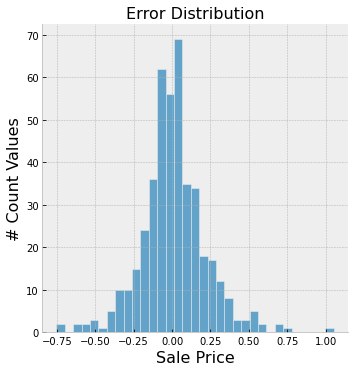

Wall time: 428 ms


In [93]:
%%time
dt, dt_m = predict(DecisionTreeRegressor(),0)

## Model: RandomForestRegressor

Training Score: 0.9822428367653105


Five first Predictions are: [12.29011458 12.52454172 11.82338057 11.66523484 12.52953514]
Five first Real values are: [12.31716669 12.4292162  11.76368418 11.77143616 12.56024446]


R^2 Score is: 0.8570165296992054
Mean Square Error(MSE) is: 0.021775944009782538
Root Mean Square Error(RMSE) is: 0.14756674425419344
Mean Absolute Error is: 0.10056706506680961
Median Absolute Error is: 0.06864476675894693
Mean Absolute Percentage Error is: 0.8441262209966562
Max Error is: 0.8490837628304231




<Figure size 1440x360 with 0 Axes>

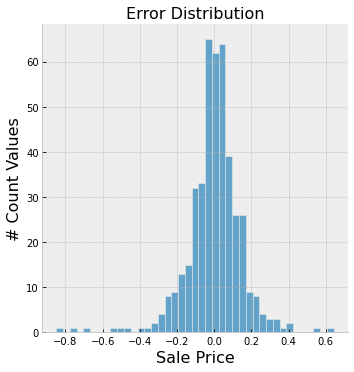

Wall time: 2.2 s


In [94]:
%%time
rf, rf_m = predict(RandomForestRegressor(),0)

## Model: KNeighborsRegressor

Training Score: 0.8911596487500691


Five first Predictions are: [12.29727532 12.5206432  11.80031371 11.73016723 12.57840727]
Five first Real values are: [12.31716669 12.4292162  11.76368418 11.77143616 12.56024446]


R^2 Score is: 0.8082985450010258
Mean Square Error(MSE) is: 0.0291955436657793
Root Mean Square Error(RMSE) is: 0.17086703504707776
Mean Absolute Error is: 0.11326985639380077
Median Absolute Error is: 0.07880129066222352
Mean Absolute Percentage Error is: 0.9476093860468884
Max Error is: 1.1308014555470116




<Figure size 1440x360 with 0 Axes>

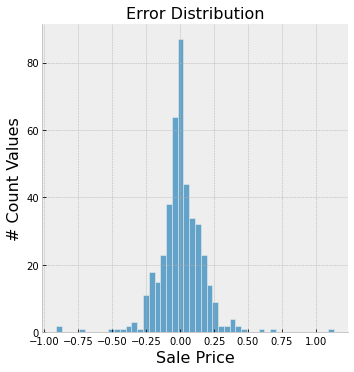

Wall time: 542 ms


In [95]:
%%time
knr, knr_m = predict(KNeighborsRegressor(),0)

## Model: AdaBoostRegressor

Training Score: 0.8666621543863506


Five first Predictions are: [12.21101723 12.33702672 11.72968087 11.57047543 12.41848407]
Five first Real values are: [12.31716669 12.4292162  11.76368418 11.77143616 12.56024446]


R^2 Score is: 0.807243754618302
Mean Square Error(MSE) is: 0.02935618500612397
Root Mean Square Error(RMSE) is: 0.1713364672395342
Mean Absolute Error is: 0.12945699266214122
Median Absolute Error is: 0.10544520486717968
Mean Absolute Percentage Error is: 1.083119022113023
Max Error is: 0.7866964239764886




<Figure size 1440x360 with 0 Axes>

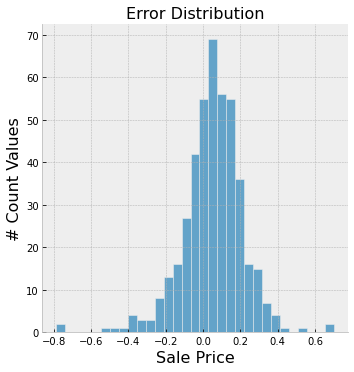

Wall time: 889 ms


In [96]:
%%time
abr, abr_m = predict(AdaBoostRegressor(),0)

## Model: GradientBoostingRegressor

Training Score: 0.9661709978914483


Five first Predictions are: [12.2800308  12.47806213 11.78436681 11.75311937 12.55167838]
Five first Real values are: [12.31716669 12.4292162  11.76368418 11.77143616 12.56024446]


R^2 Score is: 0.8851517632376988
Mean Square Error(MSE) is: 0.017491034230019097
Root Mean Square Error(RMSE) is: 0.13225367378647407
Mean Absolute Error is: 0.09000048371715164
Median Absolute Error is: 0.0638173391253467
Mean Absolute Percentage Error is: 0.7556615743610233
Max Error is: 0.7102735731927563




<Figure size 1440x360 with 0 Axes>

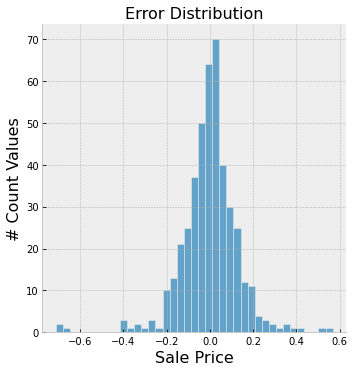

Wall time: 1.11 s


In [97]:
%%time
gbr, gbr_m = predict(GradientBoostingRegressor(),0)

## Model: BaggingRegressor

Training Score: 0.9745940073462247


Five first Predictions are: [12.32227641 12.45056545 11.85058092 11.70953295 12.58656726]
Five first Real values are: [12.31716669 12.4292162  11.76368418 11.77143616 12.56024446]


R^2 Score is: 0.8465663266892706
Mean Square Error(MSE) is: 0.023367477878393193
Root Mean Square Error(RMSE) is: 0.15286424656666187
Mean Absolute Error is: 0.10555139203930129
Median Absolute Error is: 0.07685241476292592
Mean Absolute Percentage Error is: 0.8869144235853164
Max Error is: 0.84164340746924




<Figure size 1440x360 with 0 Axes>

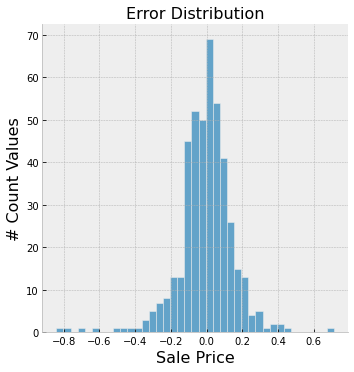

Wall time: 589 ms


In [98]:
%%time
br, br_m = predict(BaggingRegressor(),0)

## Model: XGBRegressor - Trees as base learners

Training Score: 0.2066603017862596


Five first Predictions are: [11.945287 12.163099 11.463603 11.396575 12.150688]
Five first Real values are: [12.31716669 12.4292162  11.76368418 11.77143616 12.56024446]


R^2 Score is: 0.1234881640857588
Mean Square Error(MSE) is: 0.1334900644293156
Root Mean Square Error(RMSE) is: 0.3653629215305182
Mean Absolute Error is: 0.3372344861572762
Median Absolute Error is: 0.3369354609384452
Mean Absolute Percentage Error is: 2.7947086161189847
Max Error is: 1.456671113572634




<Figure size 1440x360 with 0 Axes>

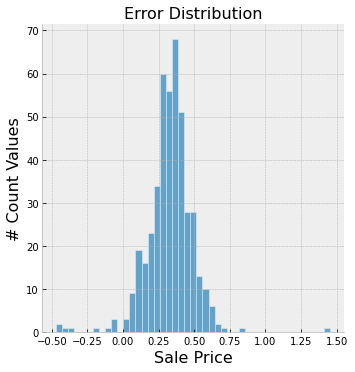

Wall time: 723 ms


In [99]:
%%time
# reg:linear is now deprecated in favor of reg:squarederror
xg_reg, xg_reg_m = predict(xgb.XGBRegressor(objective='reg:squarederror', n_estimators=10, seed=123),0)

## Model: XGBRegressor - Linear base learners

Training Score: 0.18308579596866914


Five first Predictions are: [12.222736 12.214302 11.795261 11.224712 12.764061]
Five first Real values are: [12.31716669 12.4292162  11.76368418 11.77143616 12.56024446]


R^2 Score is: -0.7437653959751032
Mean Square Error(MSE) is: 0.26557012184043405
Root Mean Square Error(RMSE) is: 0.5153349608171699
Mean Absolute Error is: 0.30996596751087724
Median Absolute Error is: 0.17746130897134726
Mean Absolute Percentage Error is: 2.601438002883705
Max Error is: 3.7206128916135555




<Figure size 1440x360 with 0 Axes>

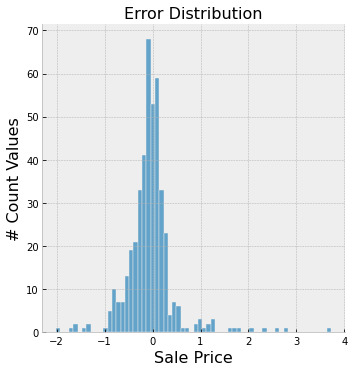

Wall time: 523 ms


In [100]:
%%time
DM_train = xgb.DMatrix(data=X_train,label=y_train)
DM_test = xgb.DMatrix(data=X_test,label=y_test)
params = {"booster":"gblinear","objective":"reg:squarederror"}

xg_reg2, xg_reg_m2 = predict(xgb.train(params = params, dtrain=DM_train, num_boost_round=10),2)

# Metrics of the models

In [102]:
models = pd.DataFrame({
    'Model': ['DecisionTreeRegressor', 'RandomForestRegressor', 'KNeighborsRegressor', 'AdaBoostClassifier',
              'GradientBoostingRegressor', 'BaggingRegressor', 'XGBRegressor-tree', 'XGBRegressor-linear'],
    'R2 Score': [dt_m[0], rf_m[0], knr_m[0], abr_m[0], gbr_m[0], br_m[0], xg_reg_m[0], xg_reg_m2[0]],
    'MSE': [dt_m[1], rf_m[1], knr_m[1], abr_m[1], gbr_m[1], br_m[1], xg_reg_m[1], xg_reg_m2[1]],
    'RMSE': [dt_m[2], rf_m[2], knr_m[2], abr_m[2], gbr_m[2], br_m[2], xg_reg_m[2], xg_reg_m2[2]],
    'MAE': [dt_m[3], rf_m[3], knr_m[3], abr_m[3], gbr_m[3], br_m[3], xg_reg_m[3], xg_reg_m2[3]],
    'MEAE': [dt_m[4], rf_m[4], knr_m[4], abr_m[4], gbr_m[4], br_m[4], xg_reg_m[4], xg_reg_m2[4]],
    'MAPE': [dt_m[5], rf_m[5], knr_m[5], abr_m[5], gbr_m[5], br_m[5], xg_reg_m[5], xg_reg_m2[5]],
                })
models.sort_values(by='RMSE', ascending=True)

Model  R2 Score       MSE      RMSE       MAE  \
4  GradientBoostingRegressor  0.885152  0.017491  0.132254  0.090000   
1      RandomForestRegressor  0.857017  0.021776  0.147567  0.100567   
5           BaggingRegressor  0.846566  0.023367  0.152864  0.105551   
2        KNeighborsRegressor  0.808299  0.029196  0.170867  0.113270   
3         AdaBoostClassifier  0.807244  0.029356  0.171336  0.129457   
0      DecisionTreeRegressor  0.697360  0.046091  0.214688  0.154158   
6          XGBRegressor-tree  0.123488  0.133490  0.365363  0.337234   
7        XGBRegressor-linear -0.743765  0.265570  0.515335  0.309966   

       MEAE      MAPE  
4  0.063817  0.755662  
1  0.068645  0.844126  
5  0.076852  0.886914  
2  0.078801  0.947609  
3  0.105445  1.083119  
0  0.109095  1.292174  
6  0.336935  2.794709  
7  0.177461  2.601438

**Insigts:**
  
- It can be seen that the model that gave the best RMSE was the GradientBoostingRegressor.

# Hyper tuning

## Model

In [103]:
clf_GBC = GradientBoostingRegressor()

param_grid_GBC = {"n_estimators": [10,100, 300, 500],
                  #"learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
                  #"min_samples_split": np.linspace(0.1, 0.5, 12),
                  #"min_samples_leaf": np.linspace(0.1, 0.5, 12),
                  "max_depth": [3, 5, 10, 15, 20, 'auto'],
                  #"criterion": ["friedman_mse",  "mae"],
                  #"max_features":["log2","sqrt"],
                  #"subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0]
                 }


In [104]:
gs_GBC = GridSearchCV(clf_GBC, param_grid_GBC, scoring='neg_root_mean_squared_error', cv=5)

In [105]:
%%time
gs_GBC.fit(X_train_, y)

Wall time: 7min 41s


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [3, 5, 10, 15, 20, 'auto'],
                         'n_estimators': [10, 100, 300, 500]},
             scoring='neg_root_mean_squared_error')

In [106]:
# Print the tuned parameter and score
print("Tuned Parameters: {}".format(gs_GBC.best_params_))
print("Best score is {}".format(gs_GBC.best_score_))

Tuned Parameters: {'max_depth': 3, 'n_estimators': 100}
Best score is -0.12491379849757893


Training Score: -0.08213519263227154


Five first Predictions are: [12.27739499 12.45010967 11.73793962 11.77208701 12.56679712]
Five first Real values are: [12.31716669 12.4292162  11.76368418 11.77143616 12.56024446]


R^2 Score is: 0.9484901438073079
Mean Square Error(MSE) is: 0.007844793122200362
Root Mean Square Error(RMSE) is: 0.08857083674777134
Mean Absolute Error is: 0.0634527784535236
Median Absolute Error is: 0.04820598760425732
Mean Absolute Percentage Error is: 0.5325936873439133
Max Error is: 0.6441925997042315




<Figure size 1440x360 with 0 Axes>

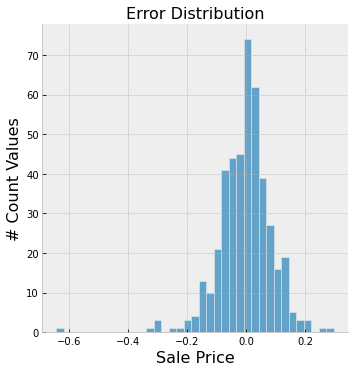

Wall time: 355 ms


In [107]:
%%time
gbc, gbc_m = predict(gs_GBC,1)

# Submission

In [108]:
# Make predictions
predictions = gs_GBC.predict(X_test_)

# Format correctly in new DataFrame: prediction_df
prediction_df = pd.DataFrame(columns=['SalePrice'],
                             index=X_test_.index,
                             data=np.expm1(predictions))

# Save prediction_df to csv called "predictions.csv"
prediction_df.to_csv("Datasets/predictions.csv")

In [109]:
prediction_df.head()

SalePrice
Id                 
1461  119605.284942
1462  160632.777730
1463  182315.514255
1464  191699.082835
1465  177741.742647

# Submission scored

- 0.13347